# **Section 0 : Importer les bibliotheques, charger et inspecter les donnees**

In [61]:
# On importe les bibliothèques nécessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, precision_recall_curve,
                           average_precision_score, accuracy_score, precision_score,
                           recall_score, f1_score, confusion_matrix, classification_report,
                           ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

print("Nos Bibliothèques de modélisation avancée importées avec succès !")

Nos Bibliothèques de modélisation avancée importées avec succès !


### **Configuration de l'affichage**

In [62]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [63]:
# Random state pour la reproductibilité
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### **Chargement des données**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [64]:
# Lecture des données
data = pd.read_csv("creditcard.csv", on_bad_lines='skip', engine='python')
print(f"Shape du dataset: {data.shape}")

# Affichage des premières lignes
print("\nAperçu des données:")
display(data.head())

Shape du dataset: (284807, 31)

Aperçu des données:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- V1–V28 : Variables issues d’une transformation PCA permettant d’anonymiser les données tout en conservant la structure utile pour la détection de fraudes.
- Amount : montant de la transaction
- Time : temps écoulé en secondes entre chaque transaction et la première transaction du dataset.
- Class : indique si la transaction est frauduleuse ou non

### **Traduire les noms des variables en français**

In [65]:
# Les colonnes de V1 à V28 représentent des dimensions mathématiques permettant de capturer les comportements transactionnels typiques et atypiques.
# Nous allons juste traduire les colonne Time, Amount et Class en français
column_translations = {
    'Time': 'Temps_ecoule_sec',
    'Amount': 'Montant_Transaction',
    'Class': 'Classe'
}
data.rename(columns=column_translations, inplace=True)

print("Noms des colonnes après traduction:")
print(data.columns.tolist())

Noms des colonnes après traduction:
['Temps_ecoule_sec', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Montant_Transaction', 'Classe']


### **Inspection basique**

In [66]:
print("INSPECTION GÉNÉRALE DU DATASET")
print("-"*30)

print(f"Dimensions: {data.shape[0]} lignes × {data.shape[1]} colonnes")
print(f"Types de données:")
print(data.dtypes.value_counts())

INSPECTION GÉNÉRALE DU DATASET
------------------------------
Dimensions: 284807 lignes × 31 colonnes
Types de données:
float64    30
int64       1
Name: count, dtype: int64


In [67]:
print(f"Informations générales:")
data.info()

Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Temps_ecoule_sec     284807 non-null  float64
 1   V1                   284807 non-null  float64
 2   V2                   284807 non-null  float64
 3   V3                   284807 non-null  float64
 4   V4                   284807 non-null  float64
 5   V5                   284807 non-null  float64
 6   V6                   284807 non-null  float64
 7   V7                   284807 non-null  float64
 8   V8                   284807 non-null  float64
 9   V9                   284807 non-null  float64
 10  V10                  284807 non-null  float64
 11  V11                  284807 non-null  float64
 12  V12                  284807 non-null  float64
 13  V13                  284807 non-null  float64
 14  V14                  284807 non-null  float6

### **Vérification des valeurs manquantes**

In [68]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_info = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
}).sort_values('Pourcentage', ascending=False)

print(f"\nValeurs manquantes:")
print(missing_info[missing_info['Valeurs_Manquantes'] > 0])



Valeurs manquantes:
Empty DataFrame
Columns: [Valeurs_Manquantes, Pourcentage]
Index: []


Il n'y a pas de valeurs manquantes..........

### **Vérification des doublons**

In [69]:
duplicates = data.duplicated().sum()
print(f"\nDoublons détectés: {duplicates} ({duplicates/len(data)*100:.4f}%)")

if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Doublons supprimés. Nouvelle shape: {data.shape}")


Doublons détectés: 1081 (0.3796%)
Doublons supprimés. Nouvelle shape: (283726, 31)




---



# **Section 1 : Analyse exploratoire (EDA)**



---



### **--- Inspection de la variable Cible**

In [70]:
# Distribution des classes
class_distribution = data['Classe'].value_counts()
class_percentage = data['Classe'].value_counts(normalize=True) * 100

print(f"\nDistribution des classes:")
for classe, count in class_distribution.items():
    print(f"  Classe {classe}: {count:6d} échantillons ({class_percentage[classe]:.4f}%)")


Distribution des classes:
  Classe 0: 283253 échantillons (99.8333%)
  Classe 1:    473 échantillons (0.1667%)


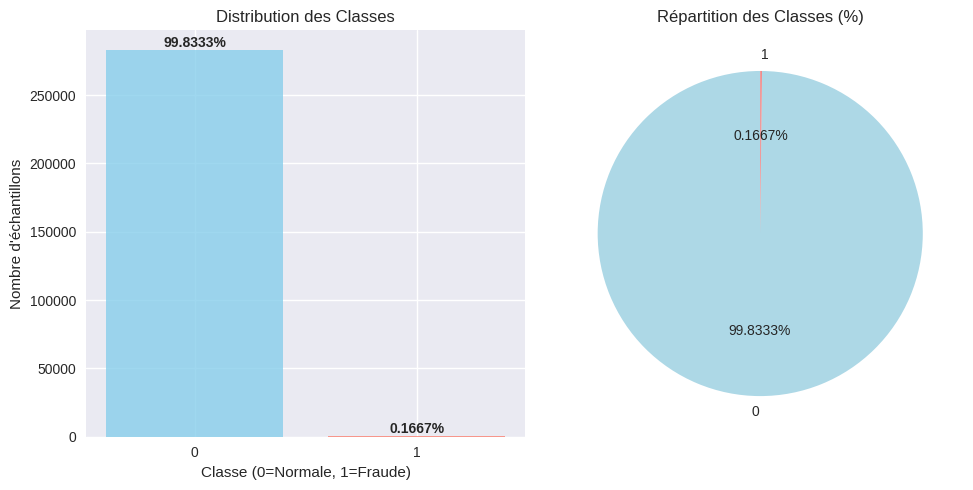

In [71]:
# Visualisation de la distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(class_distribution.index.astype(str), class_distribution.values,
               color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Distribution des Classes')
plt.xlabel('Classe (0=Normale, 1=Fraude)')
plt.ylabel('Nombre d\'échantillons')

# Ajoutons des pourcentages sur les barres
for bar, percentage in zip(bars, class_percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{percentage:.4f}%', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=class_distribution.index,
        autopct='%1.4f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Répartition des Classes (%)')

plt.tight_layout()
plt.show()

L’analyse notre variable cible "Classe" montre une répartition relativement déséquilibrée entre les deux modalités : 283 253 transaction normales et 473 transactions fraudulauses. Cet écart est forte et traduit un déséquilibre significatif des classes. Donc, il est nécessaire d’ajuster les données avant la modélisation, car les deux catégories ne sont pas bien représentées pour garantir une analyse fiable et non biaisée.

### **Statistiques descriptives**

In [72]:
# Statistiques générales
print("Statistiques générales:")
display(data.describe().T)

Statistiques générales:


,count,mean,std,min,25%,50%,75%,max
Temps_ecoule_sec,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


### **Montant des transactions**

In [73]:
# visualisons la moyenne , la médiane le max et l'ecartype du montant de transactions
print("\nANALYSE Du MONTANT DES TRANSACTIONS:")
print(f"Montant moyen: {data['Montant_Transaction'].mean():.2f} €")
print(f"Montant médian: {data['Montant_Transaction'].median():.2f} €")
print(f"Montant max: {data['Montant_Transaction'].max():.2f} €")
print(f"Écart-type: {data['Montant_Transaction'].std():.2f} €")


ANALYSE Du MONTANT DES TRANSACTIONS:
Montant moyen: 88.47 €
Montant médian: 22.00 €
Montant max: 25691.16 €
Écart-type: 250.40 €


### **Distribution des montants par classe**

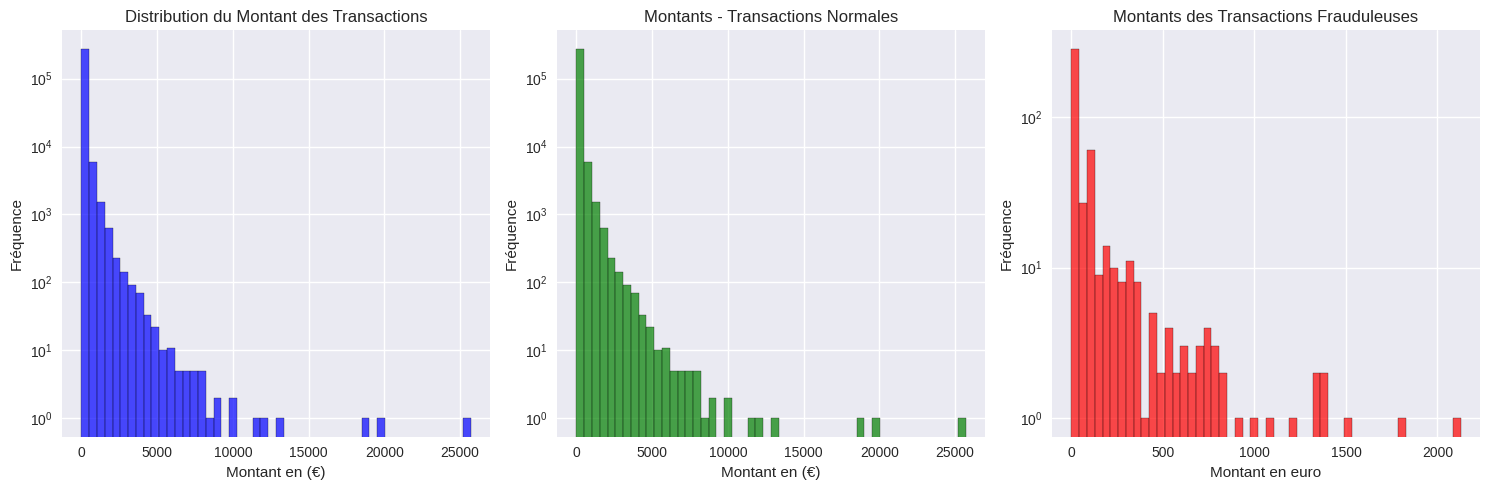

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['Montant_Transaction'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution du Montant des Transactions')
plt.xlabel('Montant en (€)')
plt.ylabel('Fréquence')
plt.yscale('log')  # Échelle log pour mieux visualiser

plt.subplot(1, 3, 2)
montant_normal = data[data['Classe'] == 0]['Montant_Transaction']
montant_fraude = data[data['Classe'] == 1]['Montant_Transaction']

plt.hist(montant_normal, bins=50, alpha=0.7, label='Normal', color='green', edgecolor='black')
plt.title('Montants - Transactions Normales')
plt.xlabel('Montant en (€)')
plt.ylabel('Fréquence')
plt.yscale('log')

plt.subplot(1, 3, 3)
plt.hist(montant_fraude, bins=50, alpha=0.7, label='Fraude', color='red', edgecolor='black')
plt.title('Montants des Transactions Frauduleuses')
plt.xlabel('Montant en euro')
plt.ylabel('Fréquence')
plt.yscale('log')

plt.tight_layout()
plt.show()

### **Analyse du temps**


ANALYSE DU TEMPS ÉCOULÉ


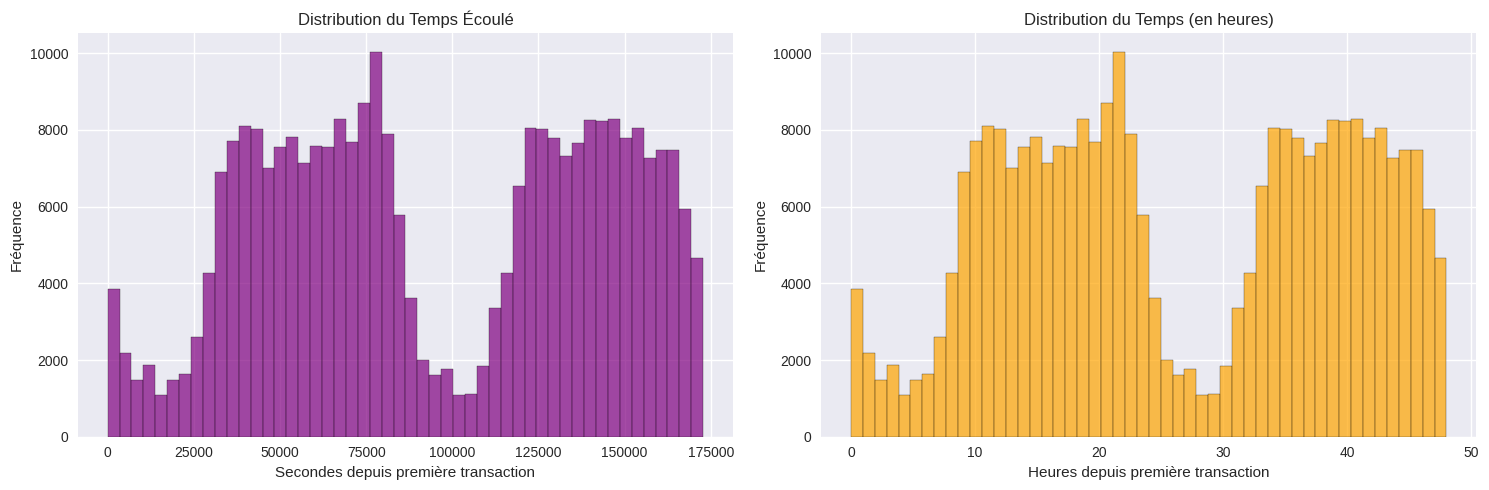

In [75]:
print("\nANALYSE DU TEMPS ÉCOULÉ")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data['Temps_ecoule_sec'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution du Temps Écoulé')
plt.xlabel('Secondes depuis première transaction')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
# Conversion en heures pour une meilleure interprétation
temps_heures = data['Temps_ecoule_sec'] / 3600
plt.hist(temps_heures, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution du Temps (en heures)')
plt.xlabel('Heures depuis première transaction')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

### **Distribution des features V1-V28**

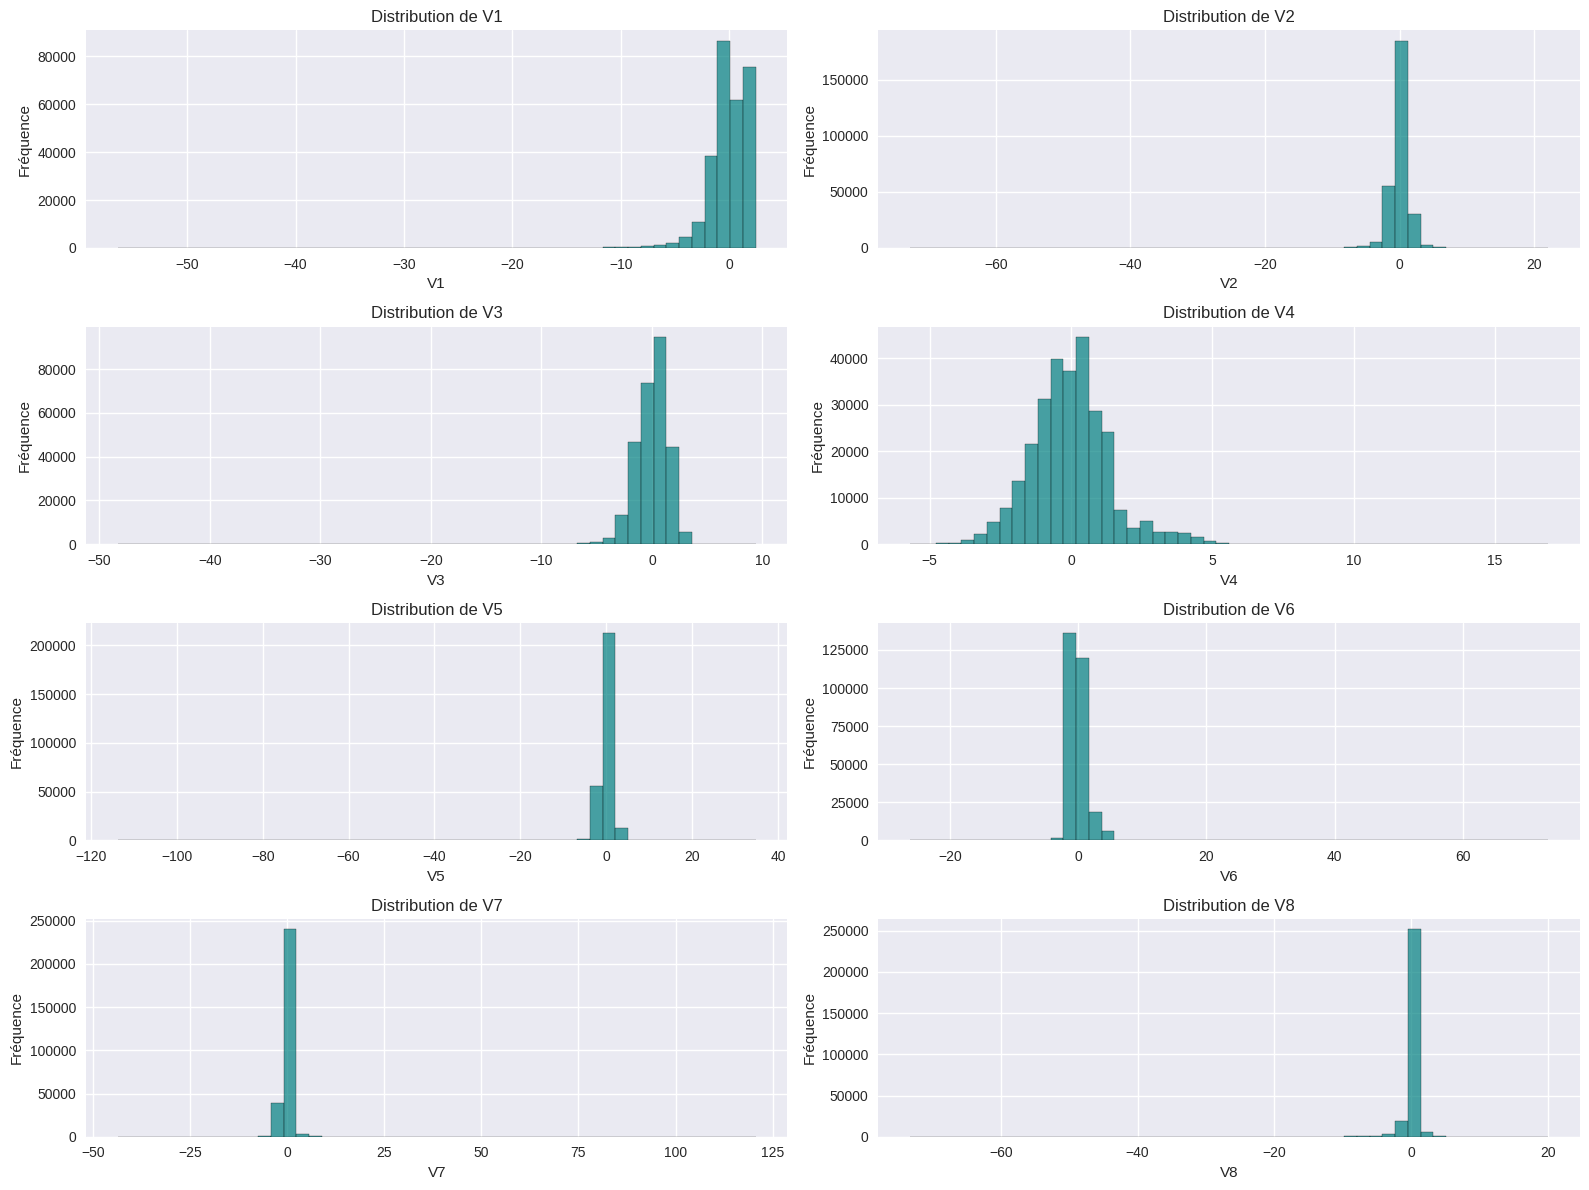

In [76]:
# Sélection de quelques features pour la visualisation
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 2, i)
    plt.hist(data[feature], bins=50, alpha=0.7, color='teal', edgecolor='black')
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()




BOXPLOTS POUR DÉTECTION DES OUTLIERS


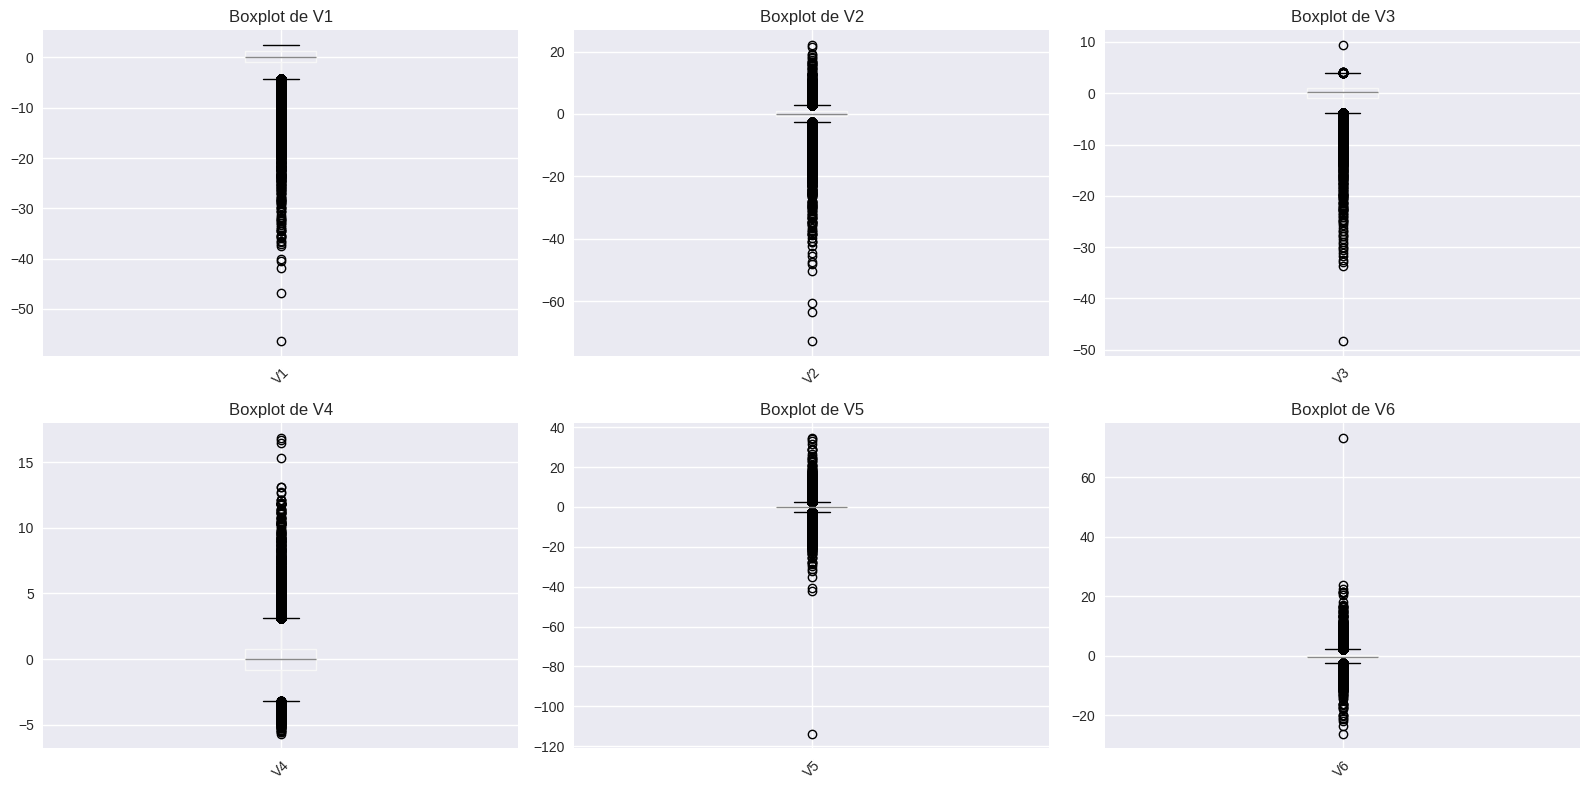

In [77]:
# Boxplots pour détecter les outliers
print("\nBOXPLOTS POUR DÉTECTION DES OUTLIERS")

plt.figure(figsize=(16, 8))
features_boxplot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']

for i, feature in enumerate(features_boxplot, 1):
    plt.subplot(2, 3, i)
    data.boxplot(column=feature)
    plt.title(f'Boxplot de {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **--- Faisons le Test de Shapiro-Wilk pour vérifier la normalité**

# **Section 2 : Pré-traitement des données**

### **Vérification finale de la qualité de nos données**

In [78]:
print(f"Shape finale du dataset aprè supp. des doublons: {data.shape}")
print(f"Valeurs manquantes totales: {data.isnull().sum().sum()}")
print(f"Doublons restants: {data.duplicated().sum()}")

# Vérification des constantes
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print(f"Colonnes constantes: {constant_columns}")

Shape finale du dataset aprè supp. des doublons: (283726, 31)
Valeurs manquantes totales: 0
Doublons restants: 0
Colonnes constantes: []


### **Séparation des features et de la target**

In [79]:
print("\nSÉPARATION FEATURES/TARGET")

X = data.drop('Classe', axis=1)
y = data['Classe']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Proportion de fraudes: {y.mean()*100:.4f}%")


SÉPARATION FEATURES/TARGET
Features (X): (283726, 30)
Target (y): (283726,)
Proportion de fraudes: 0.1667%


### **Techniques de ré-échantillonnage**

### **Split train/test avec stratification**

In [80]:

print("\nSPLIT TRAIN/TEST AVEC STRATIFICATION")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print(f"X_train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"X_test: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nDistribution dans y_train:")
print(f"  Normal: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.4f}%)")
print(f"  Fraude: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.4f}%)")

print(f"\nDistribution dans y_test:")
print(f"  Normal: {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.4f}%)")
print(f"  Fraude: {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.4f}%)")


SPLIT TRAIN/TEST AVEC STRATIFICATION
X_train: (226980, 30) (80.0%)
X_test: (56746, 30) (20.0%)
y_train: (226980,)
y_test: (56746,)

Distribution dans y_train:
  Normal: 226602 (99.8335%)
  Fraude: 378 (0.1665%)

Distribution dans y_test:
  Normal: 56651 (99.8326%)
  Fraude: 95 (0.1674%)


### **Scaling des features**

In [81]:
print("\nSCALING DES FEATURES")

# Utilisation de RobustScaler
scaler = RobustScaler()

# Application du scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversion en DataFrame pour meilleure lisibilité
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Notre Scaling terminé avec RobustScaler")

# Vérification des statistiques après scaling
print(f"\nStatistiques après scaling (X_train):")
print(f"Moyennes: {X_train_scaled.mean().mean():.6f}")
print(f"Écarts-types: {X_train_scaled.std().mean():.6f}")
print(f" Min: {X_train_scaled.min().min():.6f}")
print(f" Max: {X_train_scaled.max().max():.6f}")


SCALING DES FEATURES
Notre Scaling terminé avec RobustScaler

Statistiques après scaling (X_train):
Moyennes: 0.042113
Écarts-types: 1.225444
 Min: -144.253529
 Max: 272.096037


### **Vérification de la conservation des distributions**


VÉRIFICATION DE LA CONSERVATION DES DISTRIBUTIONS


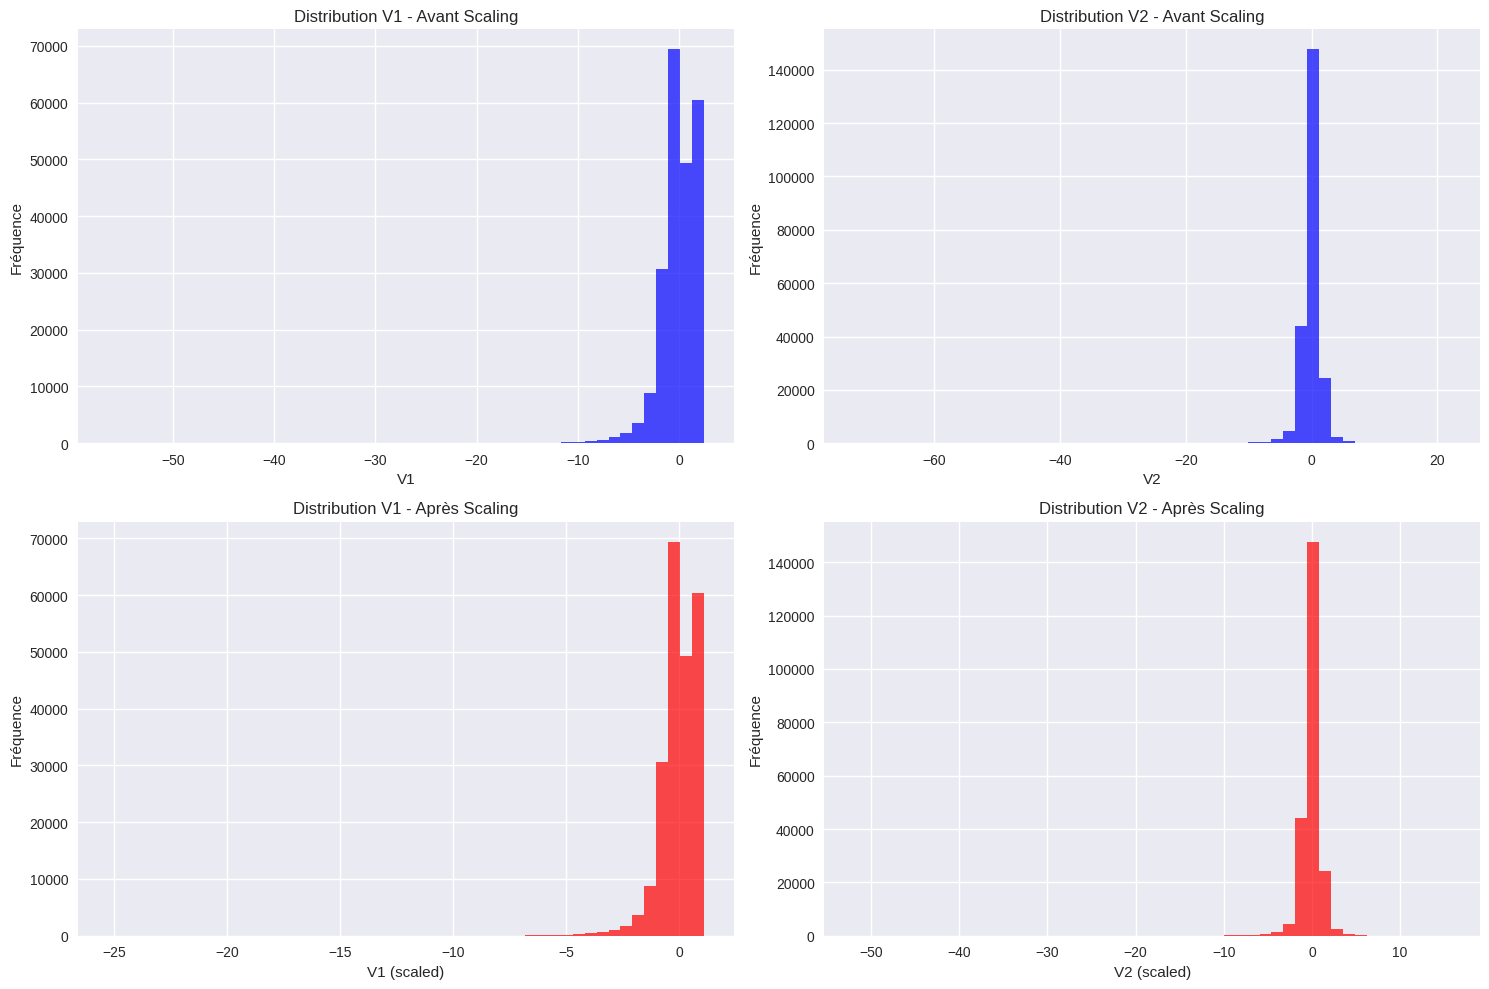

In [82]:
print("\nVÉRIFICATION DE LA CONSERVATION DES DISTRIBUTIONS")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Avant scaling
axes[0, 0].hist(X_train['V1'].values, bins=50, alpha=0.7, color='blue', label='Avant scaling')
axes[0, 0].set_title('Distribution V1 - Avant Scaling')
axes[0, 0].set_xlabel('V1')
axes[0, 0].set_ylabel('Fréquence')

axes[0, 1].hist(X_train['V2'].values, bins=50, alpha=0.7, color='blue', label='Avant scaling')
axes[0, 1].set_title('Distribution V2 - Avant Scaling')
axes[0, 1].set_xlabel('V2')
axes[0, 1].set_ylabel('Fréquence')

# Après scaling
axes[1, 0].hist(X_train_scaled['V1'].values, bins=50, alpha=0.7, color='red', label='Après scaling')
axes[1, 0].set_title('Distribution V1 - Après Scaling')
axes[1, 0].set_xlabel('V1 (scaled)')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(X_train_scaled['V2'].values, bins=50, alpha=0.7, color='red', label='Après scaling')
axes[1, 1].set_title('Distribution V2 - Après Scaling')
axes[1, 1].set_xlabel('V2 (scaled)')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

### **Méthode d'Oversampling avec SMOTE**

# **Section 3 : Analyse bivariee**

### **Fonction utilitaire pour l'analyse bivariée**

In [83]:
def plot_bivariate_analysis(feature, data, target_col='Classe'):
    """
    Analyse bivariée d'une feature avec la target classs
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Distribution par classe
    data_normal = data[data[target_col] == 0][feature]
    data_fraud = data[data[target_col] == 1][feature]

    # Histogramme comparatif
    axes[0, 0].hist(data_normal, bins=50, alpha=0.7, label='Normal', color='green')
    axes[0, 0].hist(data_fraud, bins=50, alpha=0.7, label='Fraude', color='red')
    axes[0, 0].set_title(f'Distribution de {feature} par Classe')
    axes[0, 0].set_xlabel(feature)
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].legend()
    axes[0, 0].set_yscale('log')

    # Boxplot par classe
    data_to_plot = [data_normal, data_fraud]
    axes[0, 1].boxplot(data_to_plot, labels=['Normal', 'Fraude'])
    axes[0, 1].set_title(f'Boxplot de {feature} par Classe')
    axes[0, 1].set_ylabel(feature)

    # Densité par classe
    data_normal.plot(kind='density', ax=axes[1, 0], label='Normal', color='green')
    data_fraud.plot(kind='density', ax=axes[1, 0], label='Fraude', color='red')
    axes[1, 0].set_title(f'Densité de {feature} par Classe')
    axes[1, 0].set_xlabel(feature)
    axes[1, 0].legend()

    # Violin plot
    violin_data = [data_normal, data_fraud]
    axes[1, 1].violinplot(violin_data, showmeans=True)
    axes[1, 1].set_xticks([1, 2])
    axes[1, 1].set_xticklabels(['Normal', 'Fraude'])
    axes[1, 1].set_title(f'Violin Plot de {feature} par Classe')
    axes[1, 1].set_ylabel(feature)

    plt.tight_layout()
    plt.show()

    # Statistiques descriptives par classe
    print(f"\nSTATISTIQUES DE {feature} PAR CLASSE:")
    stats_df = data.groupby(target_col)[feature].describe()
    display(stats_df)


ANALYSE DE LA FEATURE: V1


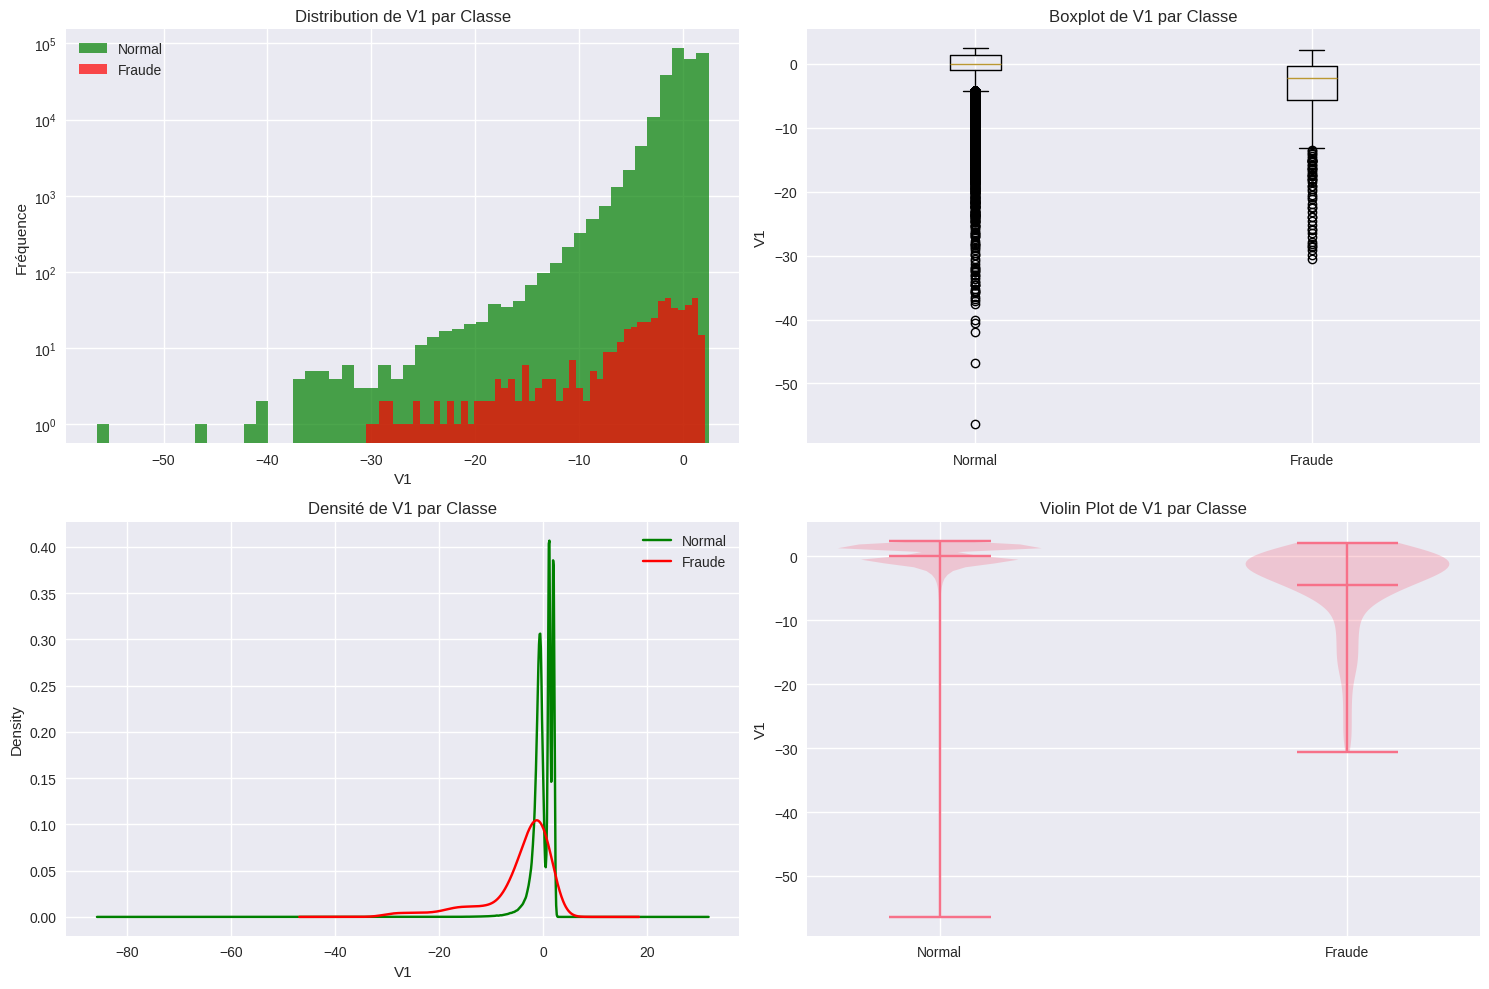


STATISTIQUES DE V1 PAR CLASSE:


,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
0,283253.0,0.013439,1.922179,-56.40751,-0.913431,0.022562,1.316788,2.454930
1,473.0,-4.498280,6.593145,-30.55238,-5.603690,-2.271755,-0.361428,2.132386



ANALYSE DE LA FEATURE: V2


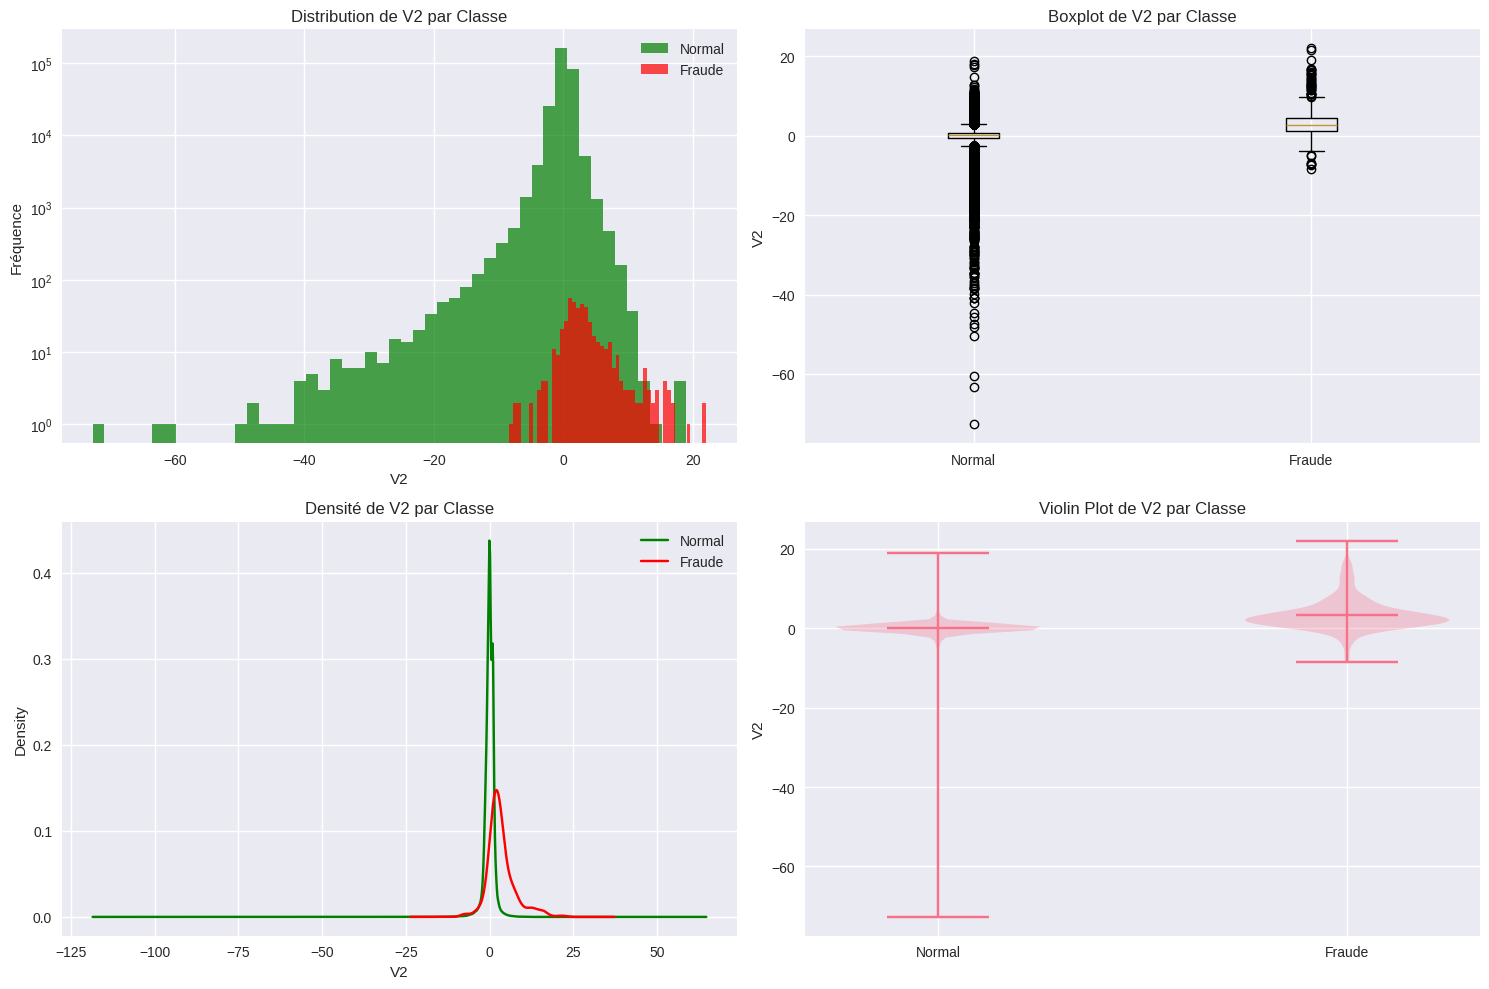


STATISTIQUES DE V2 PAR CLASSE:


,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
0,283253.0,-0.009829,1.63352,-72.715728,-0.601398,0.062561,0.797012,18.902453
1,473.0,3.405965,4.12250,-8.402154,1.145381,2.617105,4.571743,22.057729



ANALYSE DE LA FEATURE: V3


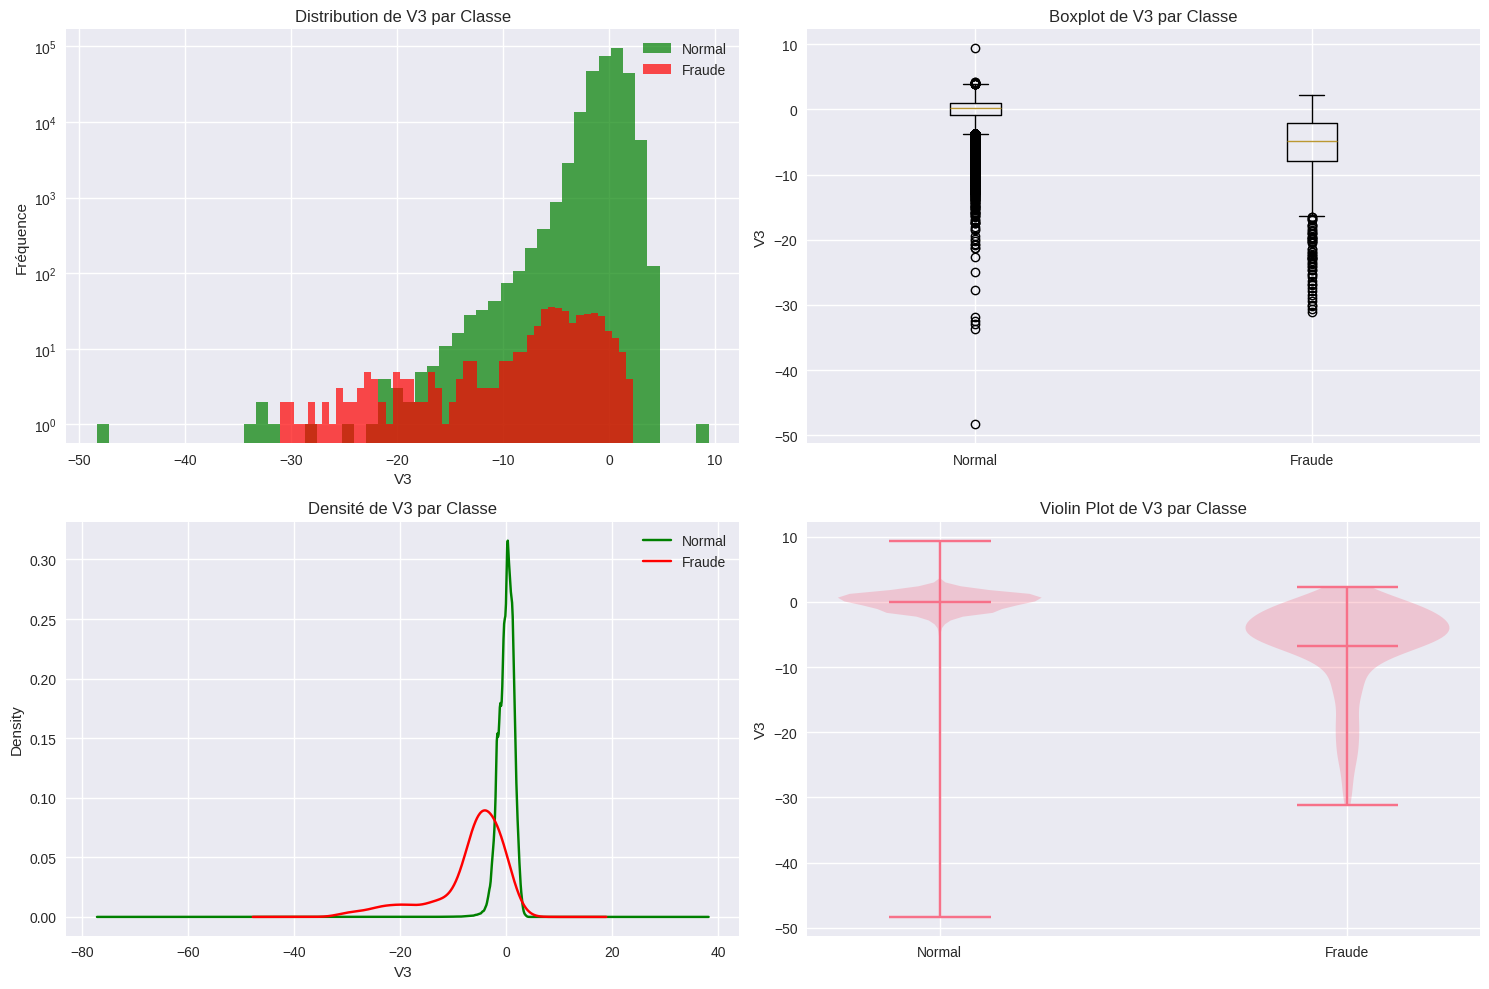


STATISTIQUES DE V3 PAR CLASSE:


,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
0,283253.0,0.012853,1.457593,-48.325589,-0.883966,0.182247,1.028261,9.382558
1,473.0,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210



ANALYSE DE LA FEATURE: V4


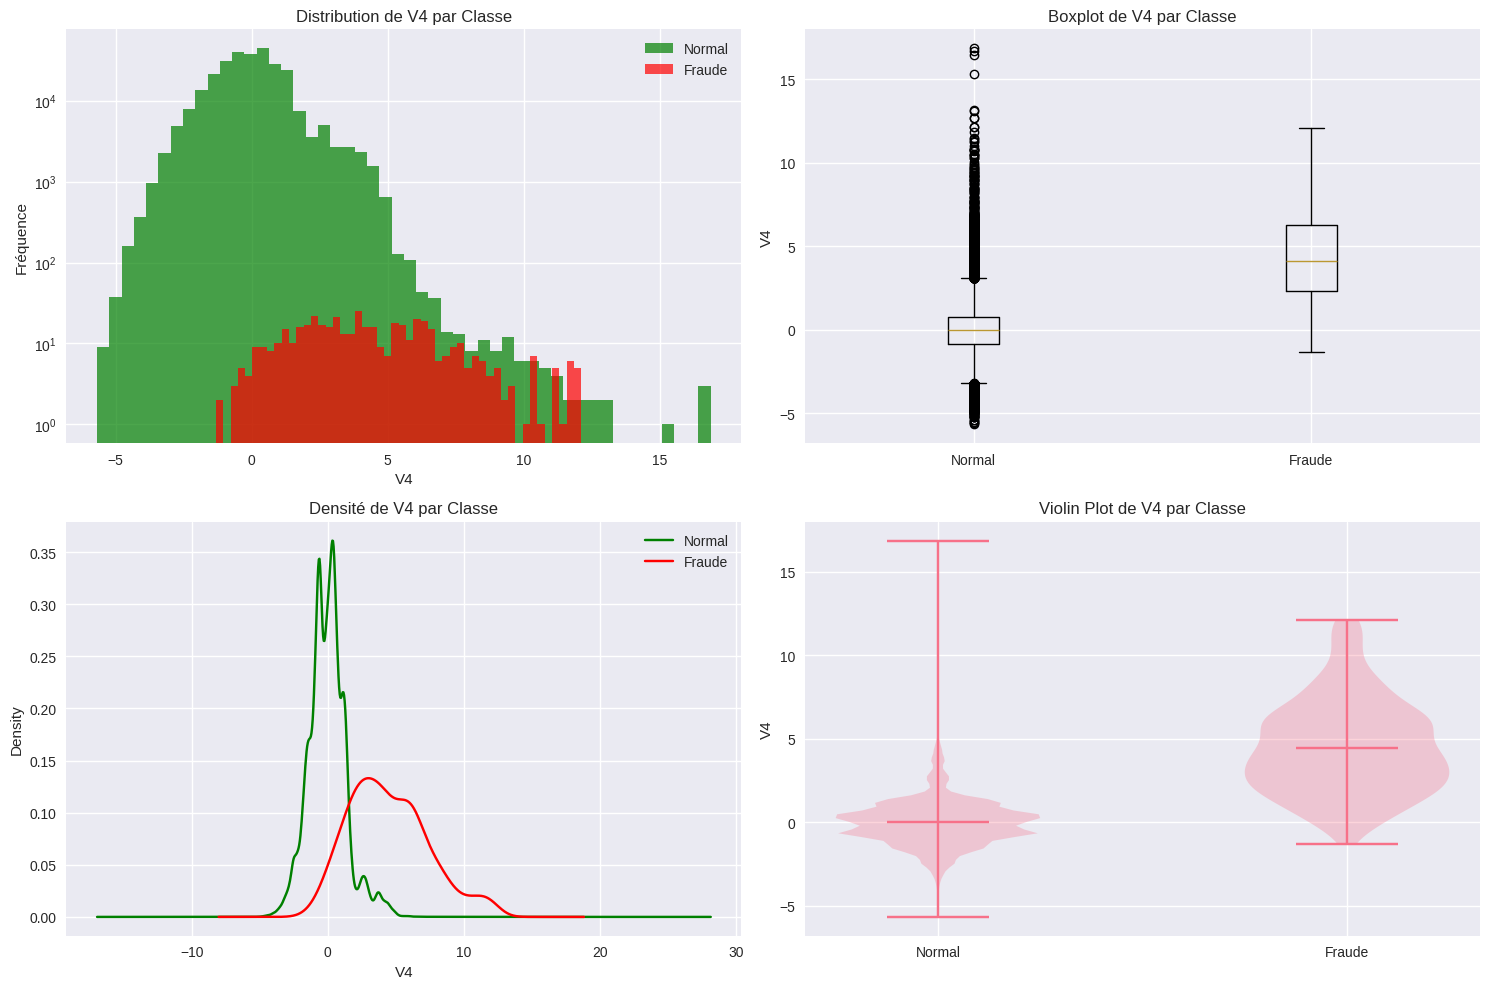


STATISTIQUES DE V4 PAR CLASSE:


,count,mean,std,min,25%,50%,75%,max
Classe,,,,,,,,
0,283253.0,-0.010440,1.398575,-5.683171,-0.851605,-0.024500,0.734231,16.875344
1,473.0,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672


In [84]:
# Sélection des features les plus discriminantes (basé sur la variance)
features_analysis = ['V1', 'V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

for feature in features_analysis[:4]:  # on limite à 4 pour la demo
    print(f"\n{'='*30}")
    print(f"ANALYSE DE LA FEATURE: {feature}")
    print(f"{'='*30}")
    plot_bivariate_analysis(feature, data)

### **Analyse du montant par classe**


ANALYSE BIVARIÉE DU MONTANT PAR CLASSE


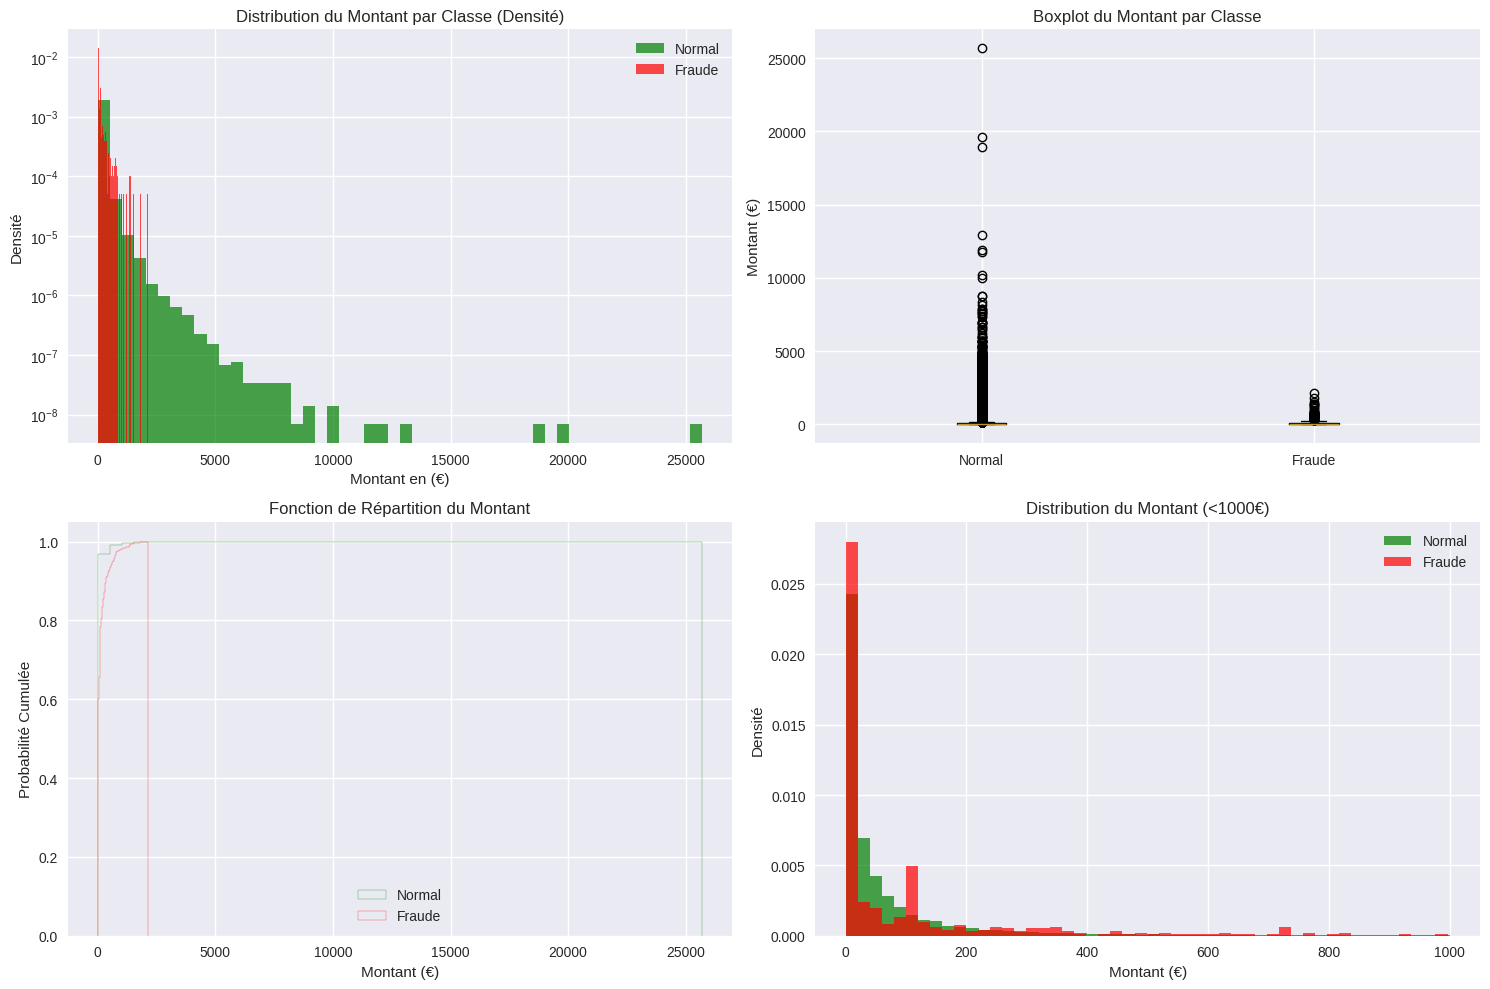


STATISTIQUES DÉTAILLÉES DU MONTANT PAR CLASSE:


,count,mean,median,std,min,max
Classe,,,,,,
0,283253,88.41,22.00,250.38,0.0,25691.16
1,473,123.87,9.82,260.21,0.0,2125.87


In [85]:
print("\nANALYSE BIVARIÉE DU MONTANT PAR CLASSE")

plt.figure(figsize=(15, 10))

# Distribution du montant
plt.subplot(2, 2, 1)
montant_normal = data[data['Classe'] == 0]['Montant_Transaction']
montant_fraude = data[data['Classe'] == 1]['Montant_Transaction']

plt.hist(montant_normal, bins=50, alpha=0.7, label='Normal', color='green', density=True)
plt.hist(montant_fraude, bins=50, alpha=0.7, label='Fraude', color='red', density=True)
plt.title('Distribution du Montant par Classe (Densité)')
plt.xlabel('Montant en (€)')
plt.ylabel('Densité')
plt.legend()
plt.yscale('log')

# Boxplot du montant
plt.subplot(2, 2, 2)
data_to_plot = [montant_normal, montant_fraude]
plt.boxplot(data_to_plot, labels=['Normal', 'Fraude'])
plt.title('Boxplot du Montant par Classe')
plt.ylabel('Montant (€)')

# Statistiques cumulatives
plt.subplot(2, 2, 3)
plt.hist(montant_normal, bins=50, alpha=0.7, label='Normal', color='green',
         cumulative=True, density=True, histtype='step')
plt.hist(montant_fraude, bins=50, alpha=0.7, label='Fraude', color='red',
         cumulative=True, density=True, histtype='step')
plt.title('Fonction de Répartition du Montant')
plt.xlabel('Montant (€)')
plt.ylabel('Probabilité Cumulée')
plt.legend()

# Focus sur les petites transactions
plt.subplot(2, 2, 4)
montant_normal_small = montant_normal[montant_normal <= 1000]
montant_fraude_small = montant_fraude[montant_fraude <= 1000]

plt.hist(montant_normal_small, bins=50, alpha=0.7, label='Normal', color='green', density=True)
plt.hist(montant_fraude_small, bins=50, alpha=0.7, label='Fraude', color='red', density=True)
plt.title('Distribution du Montant (<1000€)')
plt.xlabel('Montant (€)')
plt.ylabel('Densité')
plt.legend()

plt.tight_layout()
plt.show()

# Statistiques détaillées du montant
print("\nSTATISTIQUES DÉTAILLÉES DU MONTANT PAR CLASSE:")
montant_stats = data.groupby('Classe')['Montant_Transaction'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
display(montant_stats)

### **Matrice de corrélation**


MATRICE DE CORRÉLATION
CORRÉLATIONS AVEC LA TARGET (Classe):
Classe                 1.000000
V11                    0.149067
V4                     0.129326
V2                     0.084624
V19                    0.033631
V8                     0.033068
V21                    0.026357
V27                    0.021892
V20                    0.021486
V28                    0.009682
Montant_Transaction    0.005777
V22                    0.004887
V26                    0.004265
V25                    0.003202
V15                   -0.003300
V13                   -0.003897
V23                   -0.006333
V24                   -0.007210
Temps_ecoule_sec      -0.012359
V6                    -0.043915
V5                    -0.087812
V9                    -0.094021
V1                    -0.094486
V18                   -0.105340
V7                    -0.172347
V3                    -0.182322
V16                   -0.187186
V10                   -0.206971
V12                   -0.250711
V14       

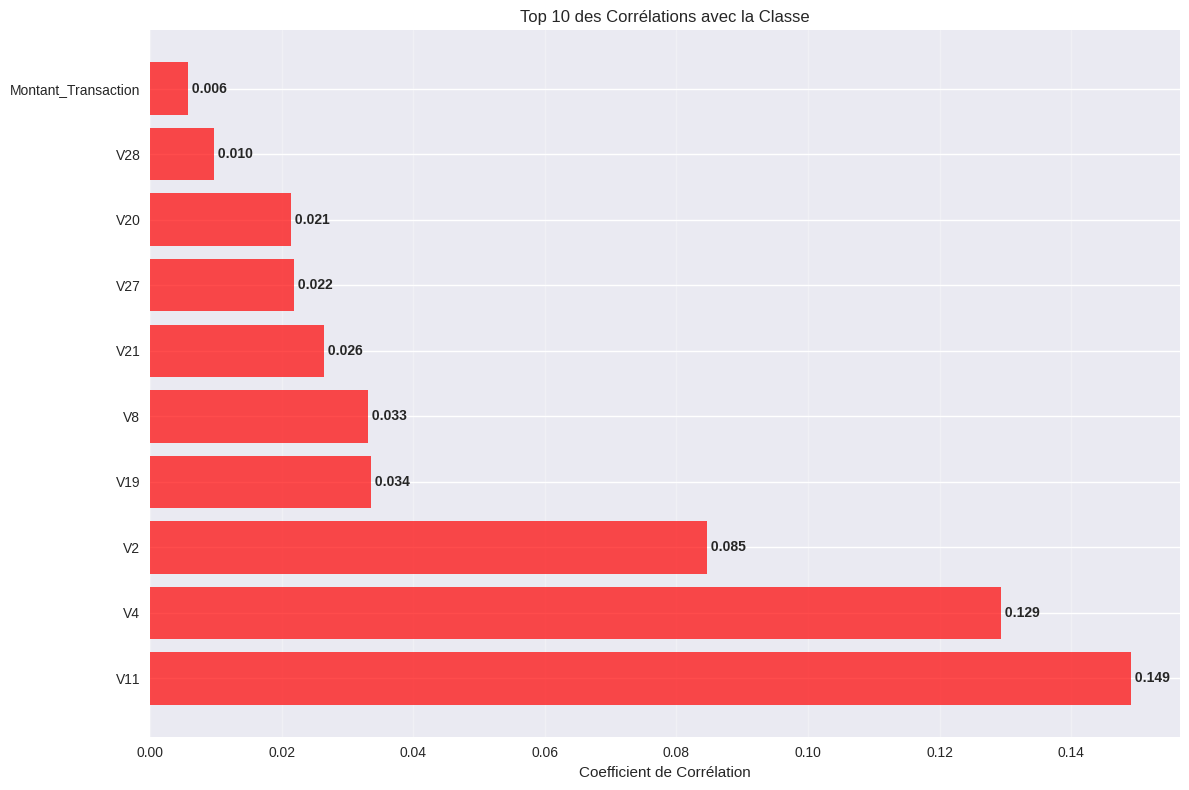

In [86]:
print("\nMATRICE DE CORRÉLATION")

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Focus sur les corrélations avec la target
target_correlations = correlation_matrix['Classe'].sort_values(ascending=False)

print("CORRÉLATIONS AVEC LA TARGET (Classe):")
print(target_correlations)

# Visualisation des corrélations les plus fortes
plt.figure(figsize=(12, 8))
top_correlations = target_correlations[1:11]  # Exclure la corrélation avec elle-même
colors = ['red' if x > 0 else 'blue' for x in top_correlations.values]

plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.title('Top 10 des Corrélations avec la Classe')
plt.xlabel('Coefficient de Corrélation')
plt.grid(axis='x', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(top_correlations.values):
    plt.text(v, i, f' {v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **Heatmap de corrélation des features les plus corrélées**


HEATMAP DES CORRÉLATIONS


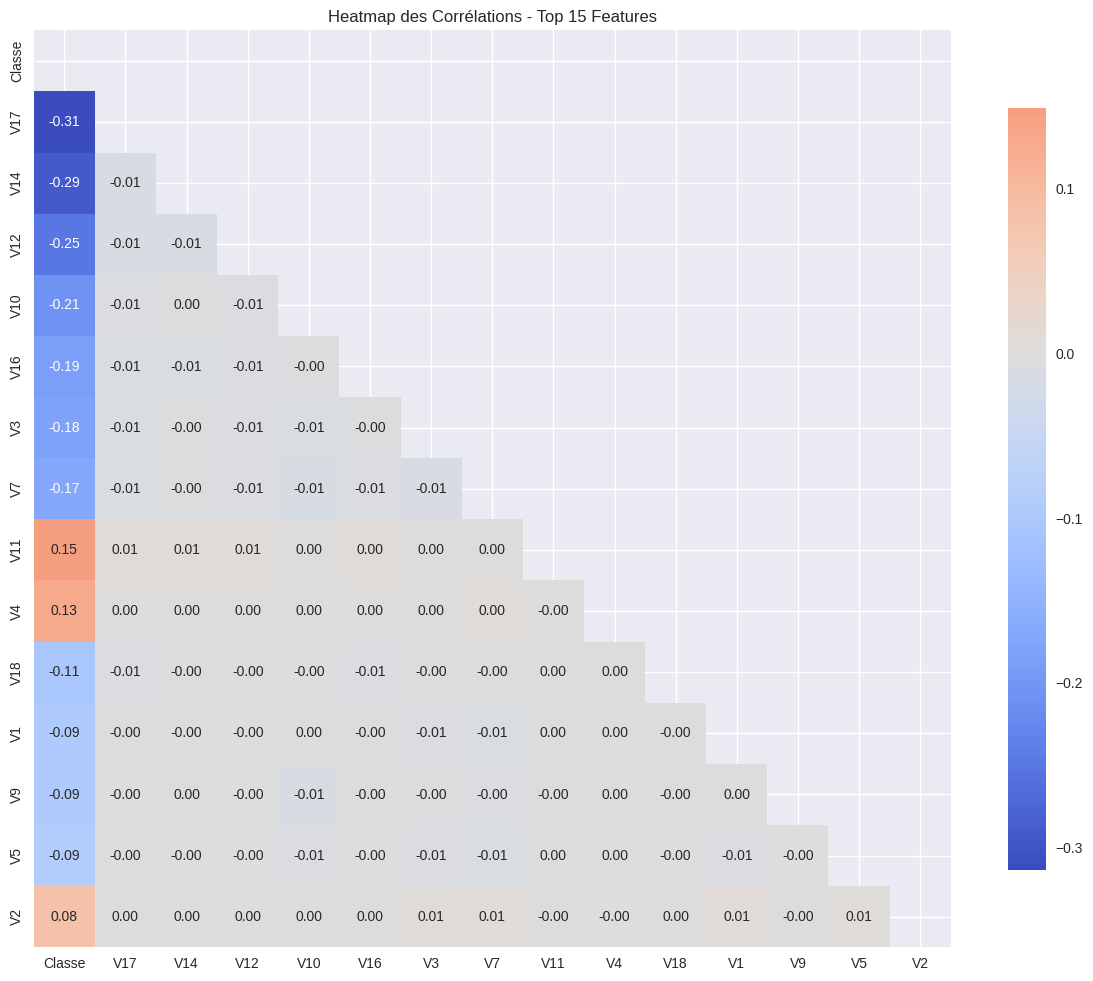

In [87]:
print("\nHEATMAP DES CORRÉLATIONS")

# Sélection des features les plus corrélées avec la target
top_features = target_correlations.abs().sort_values(ascending=False).head(15).index
correlation_top = data[top_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_top, dtype=bool))  # Masque pour le triangle supérieur

sns.heatmap(correlation_top, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Heatmap des Corrélations - Top 15 Features')
plt.tight_layout()
plt.show()

# **Section 4 : Gestion des désiquilibres**

SMOTE appliqué avec succès

--- DISTRIBUTIONS AVANT/APRÈS SMOTE ---
AVANT SMOTE (Training Set):
  Classe 0 (Normale): 226602 échantillons (99.8335%)
  Classe 1 (Fraude):     378 échantillons (0.1665%)
  Ratio: 599.5:1

APRÈS SMOTE (Training Set):
  Classe 0 (Normale): 226602 échantillons (76.9232%)
  Classe 1 (Fraude):   67980 échantillons (23.0768%)
  Ratio: 3.33:1

TEST SET (inchangé):
  Classe 0 (Normale):  56651 échantillons (99.8326%)
  Classe 1 (Fraude):      95 échantillons (0.1674%)
  Ratio: 596.3:1

--- VISUALISATION DES DISTRIBUTIONS ---


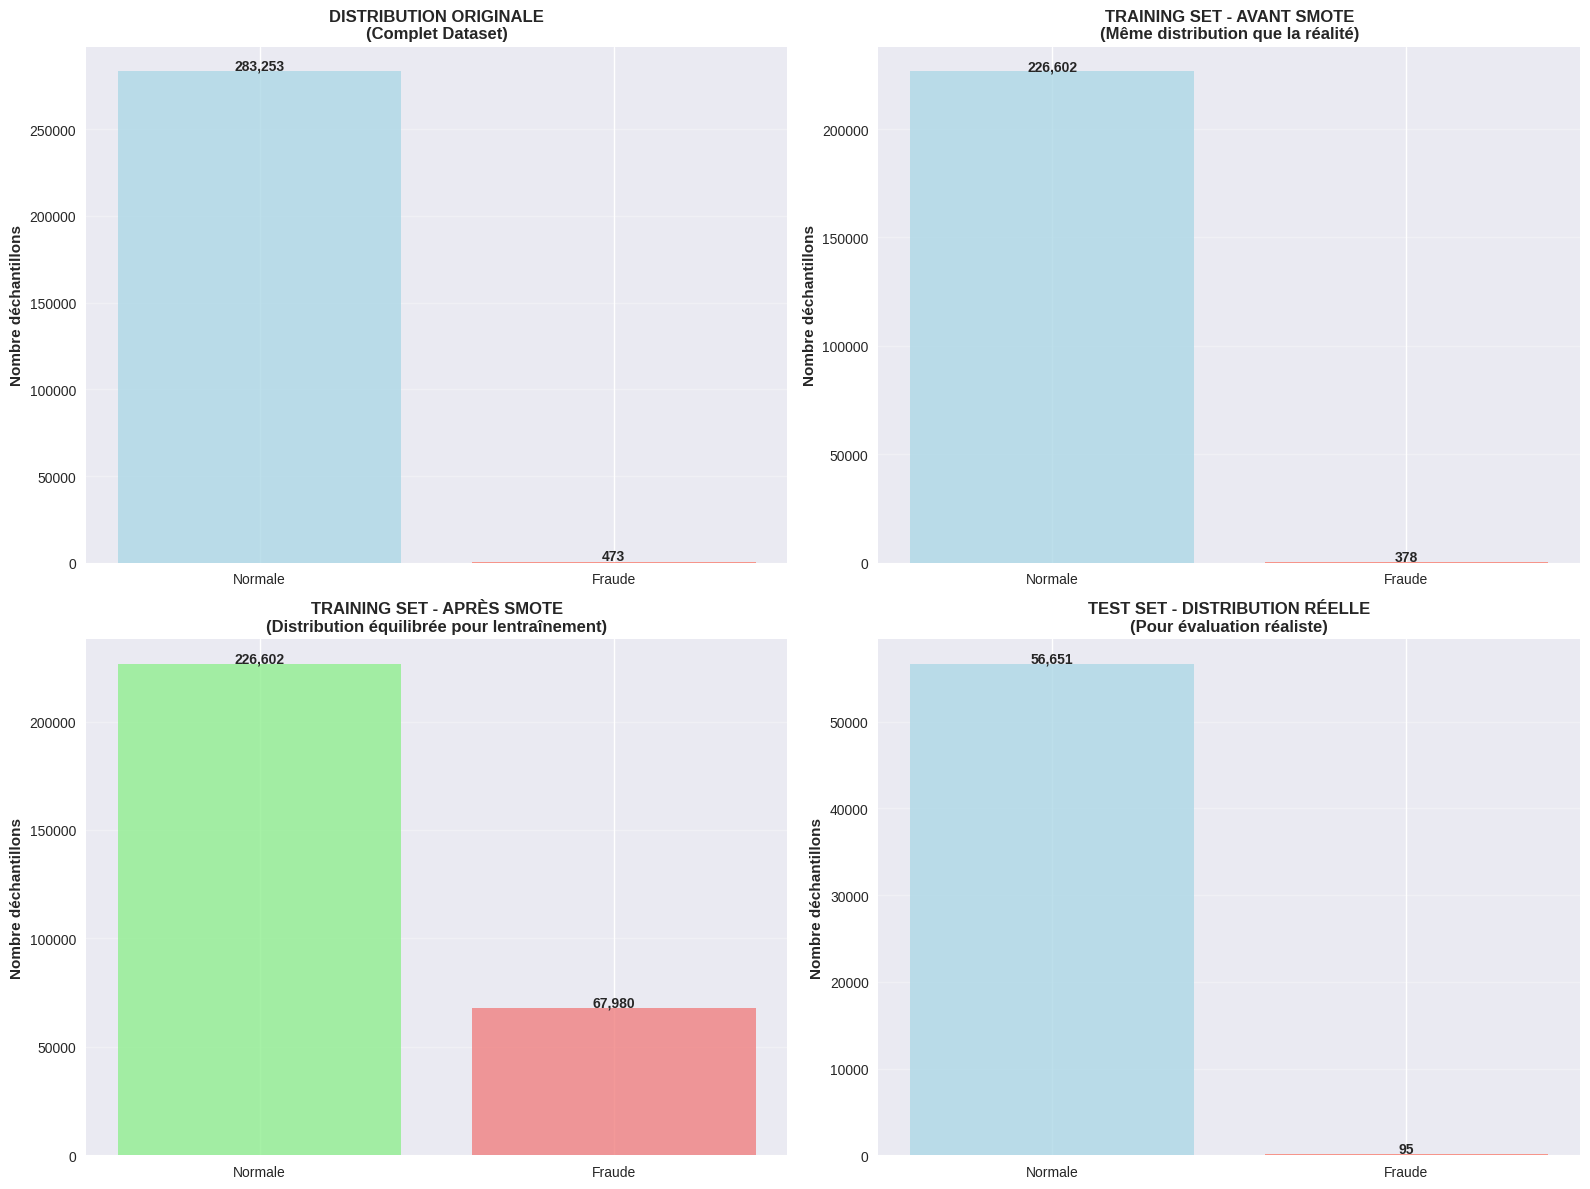

In [88]:
# Appliquer SMOTE uniquement sur le training set scaled
smote = SMOTE(random_state=RANDOM_STATE, sampling_strategy=0.3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE appliqué avec succès")

# Affichage des distributions avant/après
print(f"\n--- DISTRIBUTIONS AVANT/APRÈS SMOTE ---")
print(f"AVANT SMOTE (Training Set):")
train_before_0 = (y_train == 0).sum()
train_before_1 = (y_train == 1).sum()
print(f"  Classe 0 (Normale): {train_before_0:6d} échantillons ({(y_train == 0).mean()*100:.4f}%)")
print(f"  Classe 1 (Fraude):  {train_before_1:6d} échantillons ({(y_train == 1).mean()*100:.4f}%)")
print(f"  Ratio: {train_before_0/train_before_1:.1f}:1")

print(f"\nAPRÈS SMOTE (Training Set):")
train_after_0 = (y_train_balanced == 0).sum()
train_after_1 = (y_train_balanced == 1).sum()
print(f"  Classe 0 (Normale): {train_after_0:6d} échantillons ({(y_train_balanced == 0).mean()*100:.4f}%)")
print(f"  Classe 1 (Fraude):  {train_after_1:6d} échantillons ({(y_train_balanced == 1).mean()*100:.4f}%)")
print(f"  Ratio: {train_after_0/train_after_1:.2f}:1")

print(f"\nTEST SET (inchangé):")
test_0 = (y_test == 0).sum()
test_1 = (y_test == 1).sum()
print(f"  Classe 0 (Normale): {test_0:6d} échantillons ({(y_test == 0).mean()*100:.4f}%)")
print(f"  Classe 1 (Fraude):  {test_1:6d} échantillons ({(y_test == 1).mean()*100:.4f}%)")
print(f"  Ratio: {test_0/test_1:.1f}:1")

# Visualisation comparative
print(f"\n--- VISUALISATION DES DISTRIBUTIONS ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution originale complète
original_counts = pd.Series(y).value_counts()
axes[0, 0].bar(['Normale', 'Fraude'], original_counts.values,
                color=['lightblue', 'salmon'], alpha=0.8)
axes[0, 0].set_title('DISTRIBUTION ORIGINALE\n(Complet Dataset)', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Nombre déchantillons', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(axes[0, 0].containers[0]):
    axes[0, 0].text(i, v.get_height() + 1000, f'{v.get_height():,}',
                    ha='center', fontweight='bold', fontsize=10)

# Training set avant SMOTE
train_before_counts = pd.Series(y_train).value_counts()
axes[0, 1].bar(['Normale', 'Fraude'], train_before_counts.values,
               color=['lightblue', 'salmon'], alpha=0.8)
axes[0, 1].set_title('TRAINING SET - AVANT SMOTE\n(Même distribution que la réalité)',
                     fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Nombre déchantillons', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(axes[0, 1].containers[0]):
    axes[0, 1].text(i, v.get_height() + 500, f'{v.get_height():,}',
                    ha='center', fontweight='bold', fontsize=10)

# Training set après SMOTE
train_after_counts = pd.Series(y_train_balanced).value_counts()
axes[1, 0].bar(['Normale', 'Fraude'], train_after_counts.values,
               color=['lightgreen', 'lightcoral'], alpha=0.8)
axes[1, 0].set_title('TRAINING SET - APRÈS SMOTE\n(Distribution équilibrée pour lentraînement)',
                     fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Nombre déchantillons', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(axes[1, 0].containers[0]):
    axes[1, 0].text(i, v.get_height() + 500, f'{v.get_height():,}',
                    ha='center', fontweight='bold', fontsize=10)

# Test set (inchangé)
test_counts = pd.Series(y_test).value_counts()
axes[1, 1].bar(['Normale', 'Fraude'], test_counts.values,
               color=['lightblue', 'salmon'], alpha=0.8)
axes[1, 1].set_title('TEST SET - DISTRIBUTION RÉELLE\n(Pour évaluation réaliste)',
                     fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Nombre déchantillons', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(axes[1, 1].containers[0]):
    axes[1, 1].text(i, v.get_height() + 200, f'{v.get_height():,}',
                    ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [89]:
# Résumé final
print("1. SPLIT TRAIN/TEST avec stratification")
print("2. SCALING avec RobustScaler (train fit_transform, test transform)")
print("3. RÉÉQUILIBRAGE avec SMOTE (uniquement sur training set)")
print(f"4. Données finales prêtes pour la modélisation:")
print(f" - X_train_balanced: {X_train_balanced.shape}")
print(f" - y_train_balanced: {y_train_balanced.shape}")
print(f" - X_test_scaled:    {X_test_scaled.shape}")
print(f" -y_test:           {y_test.shape}")

# Vérification de la qualité des données après SMOTE
print(f"\n--- QUALITÉ DES DONNÉES APRÈS SMOTE --")
print(f"Vérification des valeurs manquantes: {np.isnan(X_train_balanced).sum().sum()}")
print(f"Vérification des infinis: {np.isinf(X_train_balanced).sum().sum()}")
print(f"Types de données: {X_train_balanced.dtypes.unique()}")

1. SPLIT TRAIN/TEST avec stratification
2. SCALING avec RobustScaler (train fit_transform, test transform)
3. RÉÉQUILIBRAGE avec SMOTE (uniquement sur training set)
4. Données finales prêtes pour la modélisation:
 - X_train_balanced: (294582, 30)
 - y_train_balanced: (294582,)
 - X_test_scaled:    (56746, 30)
 -y_test:           (56746,)

--- QUALITÉ DES DONNÉES APRÈS SMOTE --
Vérification des valeurs manquantes: 0
Vérification des infinis: 0
Types de données: [dtype('float64')]


# **Section 4 : Modèles & Évaluation**

### **Définir les fonctions d'évaluation**

In [90]:
print("FONCTIONS D'ÉVALUATION")


def evaluate_model(model, X_test, y_test, model_name=""):
    """
    Évalue un modèle et retourne les métriques principales
    """
    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Rapport de classification
    class_report = classification_report(y_test, y_pred, target_names=['Normal', 'Fraude'])

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'confusion_matrix': cm,
        'classification_report': class_report,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

def plot_confusion_matrix(cm, model_name=""):
    """Plot une matrice de confusion stylisée"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraude'],
                yticklabels=['Normal', 'Fraude'])
    plt.title(f'Matrice de Confusion - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Étiquettes prédites')
    plt.show()

def plot_roc_curves(results_dict):
    """Plot les courbes ROC pour tous les modèles"""
    plt.figure(figsize=(10, 8))

    for model_name, results in results_dict.items():
        y_test = results.get('y_test', y_test)  # Fallback to global y_test
        y_pred_proba = results['y_pred_proba']

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = results['roc_auc']

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

def plot_precision_recall_curves(results_dict):
    """Plot les courbes Precision-Recall pour tous les modèles"""
    plt.figure(figsize=(10, 8))

    for model_name, results in results_dict.items():
        y_test = results.get('y_test', y_test)  # Fallback to global y_test
        y_pred_proba = results['y_pred_proba']

        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = results['avg_precision']

        plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.4f})', linewidth=2)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Courbes Precision-Recall - Comparaison des Modèles', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

def display_metrics_comparison(results_dict):
    """Affiche un tableau comparatif des métriques"""
    metrics_df = pd.DataFrame({
        model_name: {
            'Accuracy': results['accuracy'],
            'Precision': results['precision'],
            'Recall': results['recall'],
            'F1-Score': results['f1_score'],
            'ROC AUC': results['roc_auc'],
            'Avg Precision': results['avg_precision']
        }
        for model_name, results in results_dict.items()
    }).T

    # Style le DataFrame
    styled_df = metrics_df.style\
        .background_gradient(cmap='Blues', axis=0)\
        .format('{:.4f}')\
        .set_caption('COMPARAISON DES MÉTRIQUES PAR MODÈLE')

    return styled_df

FONCTIONS D'ÉVALUATION


### **Initialisation des modèles**

In [91]:
import time

# Dictionnaire pour stocker les résultats
results = {}

# MODÈLES OPTIMISÉS pour vitesse
fast_models = {
    'Logistic Regression': LogisticRegression(
        random_state=RANDOM_STATE,
        class_weight='balanced',
        max_iter=500,
        n_jobs=-1
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        random_state=RANDOM_STATE,
        class_weight='balanced',
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        random_state=RANDOM_STATE,
        scale_pos_weight=len(y_train_balanced[y_train_balanced==0]) / len(y_train_balanced[y_train_balanced==1]),
        n_estimators=50,  # Réduit
        max_depth=6,      # Limité
        n_jobs=-1
    ),
    'LightGBM': LGBMClassifier(
        random_state=RANDOM_STATE,
        class_weight='balanced',
        n_estimators=50,  # Réduit
        n_jobs=-1,
        verbose=-1
    )
}

print("Modèles définis :")
for model_name, model in fast_models.items():
    print(f"- {model_name}")



Modèles définis :
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM


### **Entraînement et évaluation des modèles**


Début de l'entraînement des modèles optimisés...
------------------------------------------------------------

Entraînement: Logistic Regression
........................................
Terminé en 5.98s
Accuracy: 0.9744
Precision: 0.0545
Recall: 0.8737
F1-Score: 0.1027
ROC AUC: 0.9600


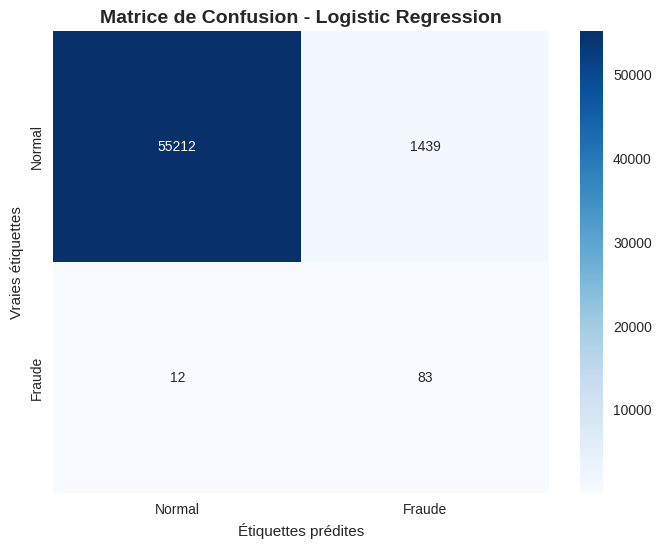


Entraînement: Random Forest
........................................
Terminé en 101.48s
Accuracy: 0.9987
Precision: 0.5778
Recall: 0.8211
F1-Score: 0.6783
ROC AUC: 0.9772


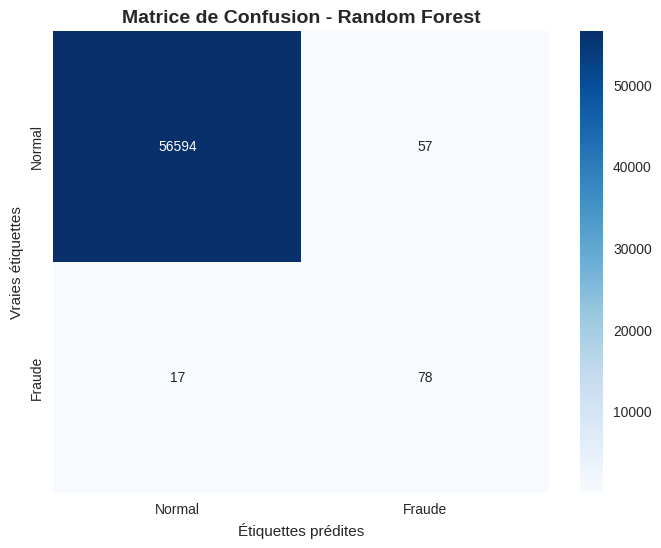


Entraînement: XGBoost
........................................
Terminé en 5.17s
Accuracy: 0.9990
Precision: 0.6555
Recall: 0.8211
F1-Score: 0.7290
ROC AUC: 0.9633


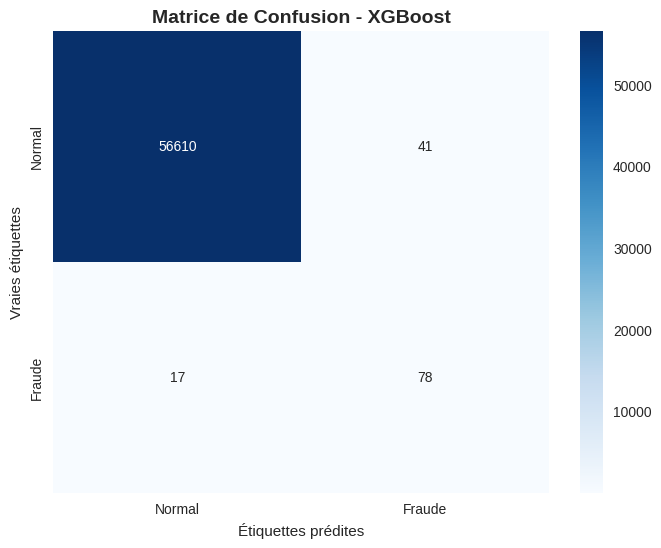


Entraînement: LightGBM
........................................
Terminé en 4.17s
Accuracy: 0.9966
Precision: 0.3110
Recall: 0.8316
F1-Score: 0.4527
ROC AUC: 0.9722


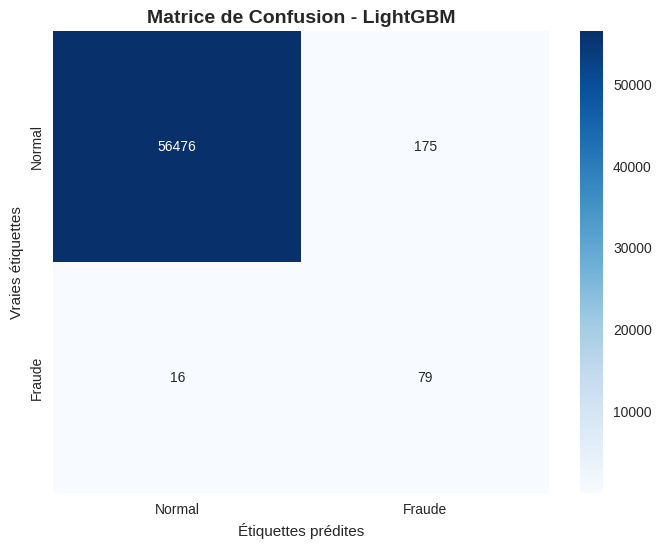

In [92]:
print("\nDébut de l'entraînement des modèles optimisés...")
print("-" * 60)

for model_name, model in fast_models.items():
    print(f"\nEntraînement: {model_name}")
    print("." * 40)

    # Entraînement avec timer
    start_time = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    training_time = time.time() - start_time

    # Évaluation
    model_results = evaluate_model(model, X_test_scaled, y_test, model_name)
    model_results['training_time'] = training_time

    # Stockage des résultats
    results[model_name] = model_results

    # Affichage compact des résultats
    print(f"Terminé en {training_time:.2f}s")
    print(f"Accuracy: {model_results['accuracy']:.4f}")
    print(f"Precision: {model_results['precision']:.4f}")
    print(f"Recall: {model_results['recall']:.4f}")
    print(f"F1-Score: {model_results['f1_score']:.4f}")
    print(f"ROC AUC: {model_results['roc_auc']:.4f}")

    # Matrice de confusion (optionnel - commenter si trop long)
    plot_confusion_matrix(model_results['confusion_matrix'], model_name)

In [93]:

    print(f"\nRapport de Classification - {model_name}:")
    print(model_results['classification_report'])


Rapport de Classification - LightGBM:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56651
      Fraude       0.31      0.83      0.45        95

    accuracy                           1.00     56746
   macro avg       0.66      0.91      0.73     56746
weighted avg       1.00      1.00      1.00     56746



### **Comparaison des modèles**

TABLEAU COMPARATIF DES MÉTRIQUES:


,Accuracy,Precision,Recall,F1-Score,ROC AUC,Avg Precision
Logistic Regression,0.9744,0.0545,0.8737,0.1027,0.9600,0.6731
Random Forest,0.9987,0.5778,0.8211,0.6783,0.9772,0.7916
XGBoost,0.9990,0.6555,0.8211,0.7290,0.9633,0.8085
LightGBM,0.9966,0.3110,0.8316,0.4527,0.9722,0.7124


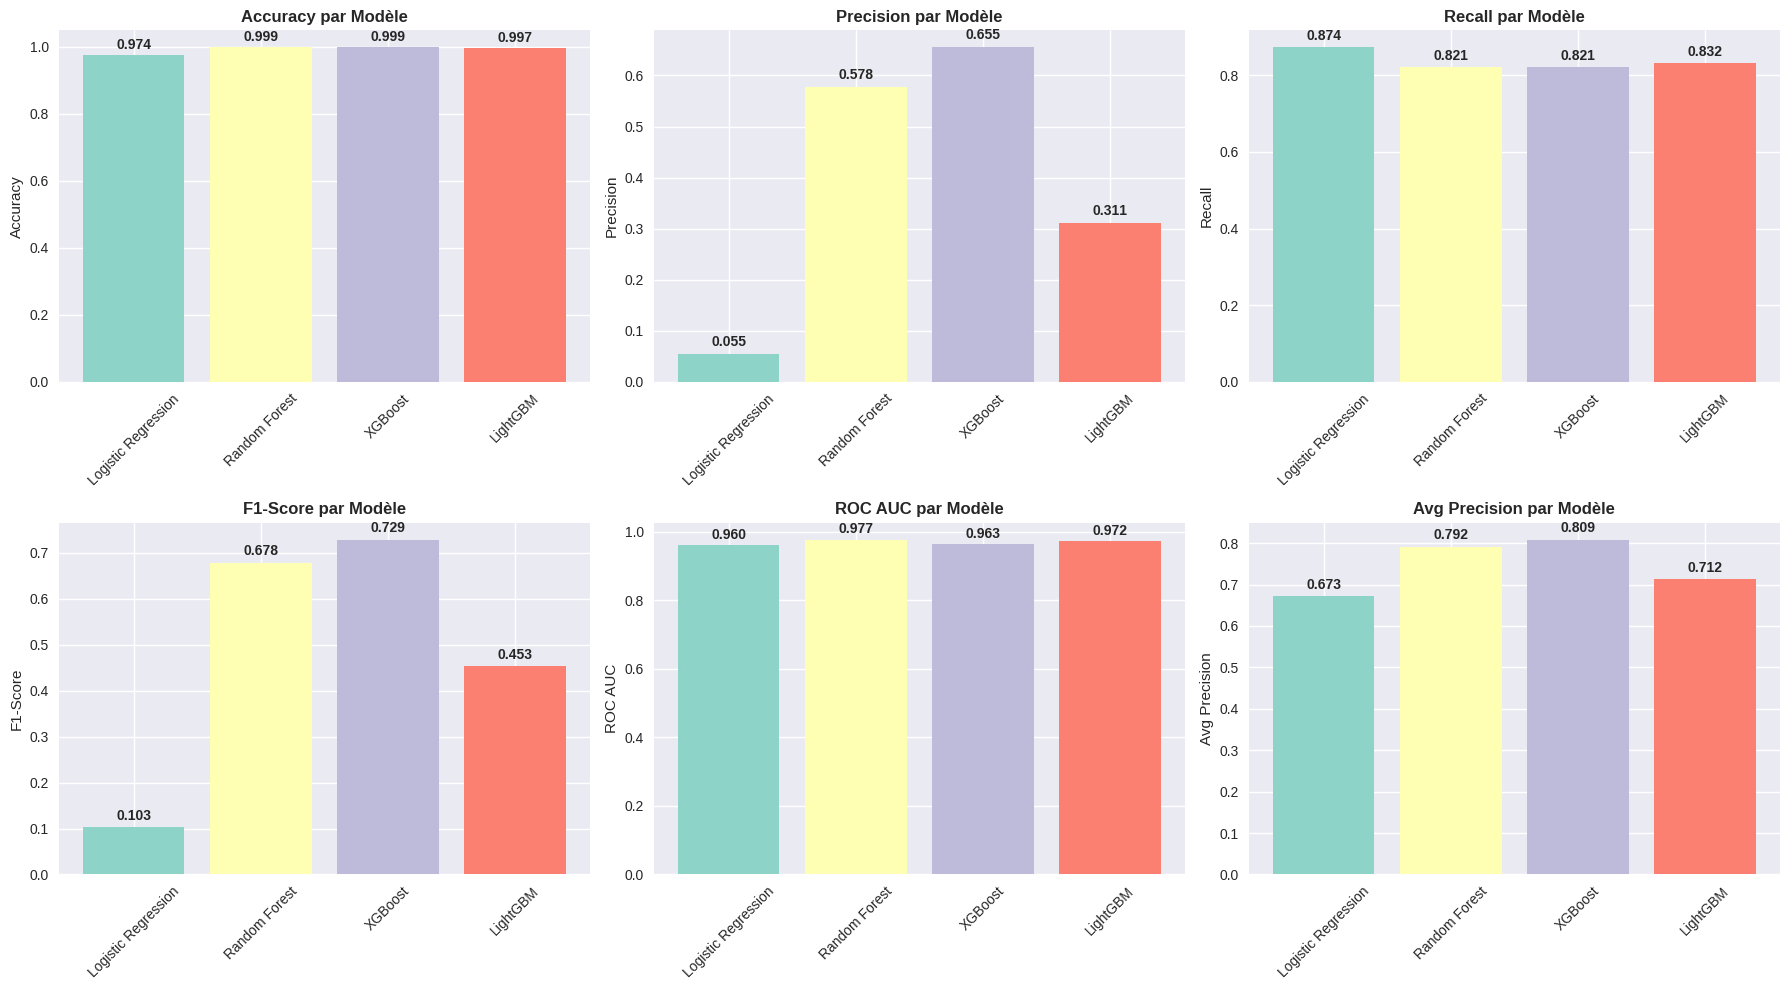


COURBES ROC - COMPARAISON:


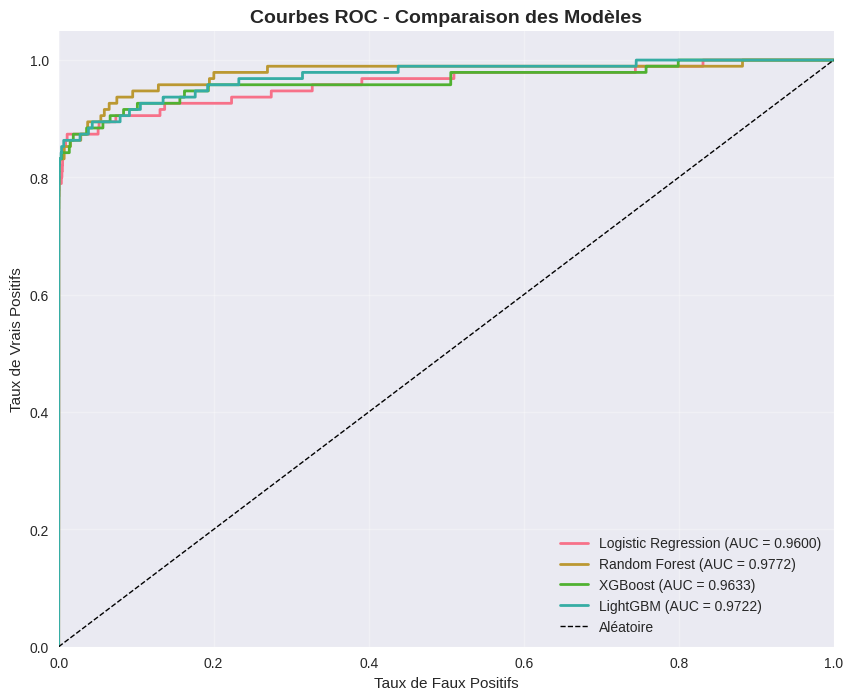


COURBES PRECISION-RECALL - COMPARAISON:


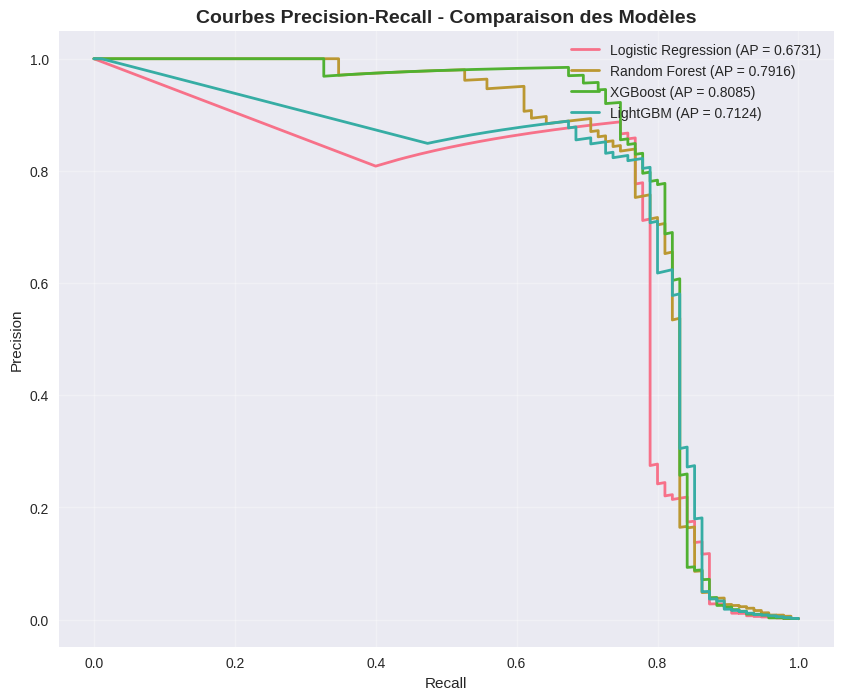

In [102]:
# Tableau comparatif
print("TABLEAU COMPARATIF DES MÉTRIQUES:")
comparison_df = display_metrics_comparison(results)
display(comparison_df)

#  Redéfinir les fonctions avec le bon scope
def plot_roc_curves(results_dict, y_test_global):
    """Plot les courbes ROC pour tous les modèles"""
    plt.figure(figsize=(10, 8))

    for model_name, results in results_dict.items():
        # Utiliser y_test_global passé en paramètre
        y_pred_proba = results['y_pred_proba']

        fpr, tpr, _ = roc_curve(y_test_global, y_pred_proba)
        roc_auc = results['roc_auc']

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Aléatoire')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

def plot_precision_recall_curves(results_dict, y_test_global):
    """Plot les courbes Precision-Recall pour tous les modèles"""
    plt.figure(figsize=(10, 8))

    for model_name, results in results_dict.items():
        # Utiliser y_test_global passé en paramètre
        y_pred_proba = results['y_pred_proba']

        precision, recall, _ = precision_recall_curve(y_test_global, y_pred_proba)
        avg_precision = results['avg_precision']

        plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.4f})', linewidth=2)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Courbes Precision-Recall - Comparaison des Modèles', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

# Visualisation des métriques
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'avg_precision']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Avg Precision']

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[idx//3, idx%3]
    metric_values = [results[model][metric] for model in results.keys()]

    bars = ax.bar(results.keys(), metric_values, color=plt.cm.Set3(np.arange(len(results))))
    ax.set_title(f'{name} par Modèle', fontweight='bold')
    ax.set_ylabel(name)
    ax.tick_params(axis='x', rotation=45)

    # Ajouter les valeurs sur les barres
    for bar, value in zip(bars, metric_values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Courbes ROC
print("\nCOURBES ROC - COMPARAISON:")
plot_roc_curves(results, y_test)

# Courbes Precision-Recall -
print("\nCOURBES PRECISION-RECALL - COMPARAISON:")
plot_precision_recall_curves(results, y_test)


In [ ]:
# Création du DataFrame de comparaison
comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append({
        'Modèle': model_name,
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc'],
        'Avg_Precision': metrics['avg_precision']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Avg_Precision', ascending=False)

print("CLASSEMENT DES MODÈLES (par Average Precision):")
display(comparison_df.round(4))

CLASSEMENT DES MODÈLES (par Average Precision):


,Modèle,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Avg_Precision
2,XGBoost,0.9996,0.9605,0.7684,0.8538,0.9790,0.8236
1,Random Forest,0.9995,0.9710,0.7053,0.8171,0.9246,0.7958
0,Logistic Regression,0.9753,0.0564,0.8737,0.1059,0.9657,0.6718


### **Analyse détaillée du meilleur modèle**

MEILLEUR MODÈLE IDENTIFIÉ: XGBoost
F1-Score: 0.7290
ROC AUC: 0.9633
Temps d'entraînement: 5.17 secondes

ANALYSE DÉTAILLÉE - XGBoost
------------------------------------------------------------
MATRICE DE CONFUSION DÉTAILLÉE:


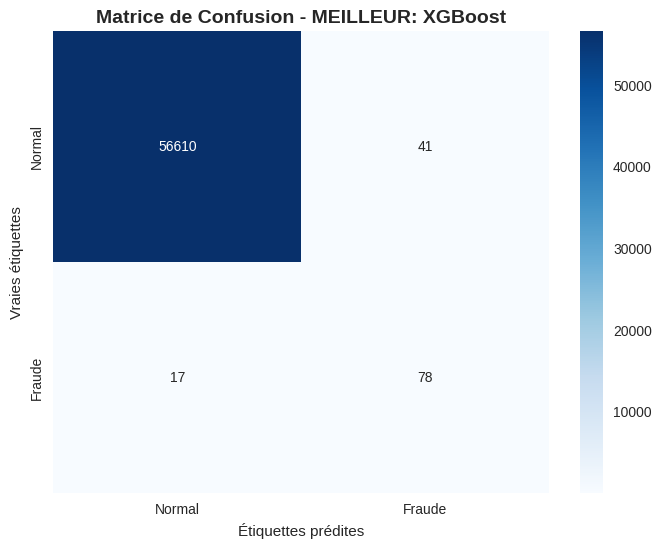

MÉTRIQUES DÉTAILLÉES:
   Accuracy: 0.9990
   Precision: 0.6555
   Recall: 0.8211
   F1-Score: 0.7290
   ROC AUC: 0.9633
   Average Precision: 0.8085

L'IMPORTANCE DES FEATURES:


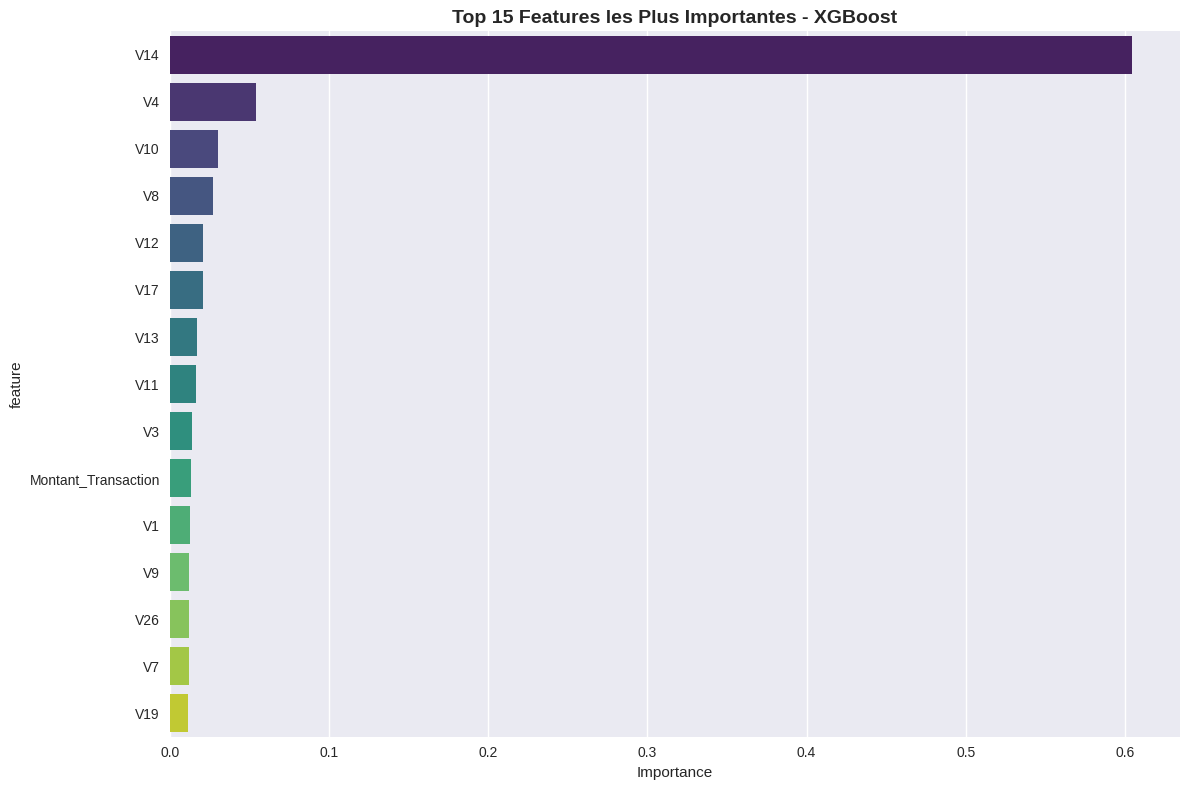

Top 10 features les plus importantes:


,feature,importance
14,V14,0.604367
4,V4,0.054241
10,V10,0.030558
8,V8,0.027125
12,V12,0.020958
17,V17,0.020681
13,V13,0.017472
11,V11,0.016501
3,V3,0.013897
29,Montant_Transaction,0.013424


In [99]:
# Identification du meilleur modèle basé sur le F1-Score
best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
best_model_results = results[best_model_name]

print(f"MEILLEUR MODÈLE IDENTIFIÉ: {best_model_name}")
print(f"F1-Score: {best_model_results['f1_score']:.4f}")
print(f"ROC AUC: {best_model_results['roc_auc']:.4f}")
print(f"Temps d'entraînement: {best_model_results['training_time']:.2f} secondes")

# Récupérer le modèle entraîné
best_model = None
for model_name, model in models.items():
    if model_name == best_model_name:
        best_model = model
        break

# Analyse détaillée
print(f"\nANALYSE DÉTAILLÉE - {best_model_name}")
print(f"{'-'*60}")

#  Matrice de confusion détaillée
print("MATRICE DE CONFUSION DÉTAILLÉE:")
plot_confusion_matrix(best_model_results['confusion_matrix'], f"MEILLEUR: {best_model_name}")

#  Métriques détaillées
print("MÉTRIQUES DÉTAILLÉES:")
detailed_metrics = {
    'Accuracy': best_model_results['accuracy'],
    'Precision': best_model_results['precision'],
    'Recall': best_model_results['recall'],
    'F1-Score': best_model_results['f1_score'],
    'ROC AUC': best_model_results['roc_auc'],
    'Average Precision': best_model_results['avg_precision']
}

for metric, value in detailed_metrics.items():
    print(f"   {metric}: {value:.4f}")

# Feature Importance (si disponible)
if hasattr(best_model, 'feature_importances_'):
    print("\nL'IMPORTANCE DES FEATURES:")
    feature_importance = pd.DataFrame({
        'feature': X_train_balanced.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title(f'Top 15 Features les Plus Importantes - {best_model_name}',
              fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("Top 10 features les plus importantes:")
    display(feature_importance.head(10))



COURBES DE PERFORMANCE DÉTAILLÉES:


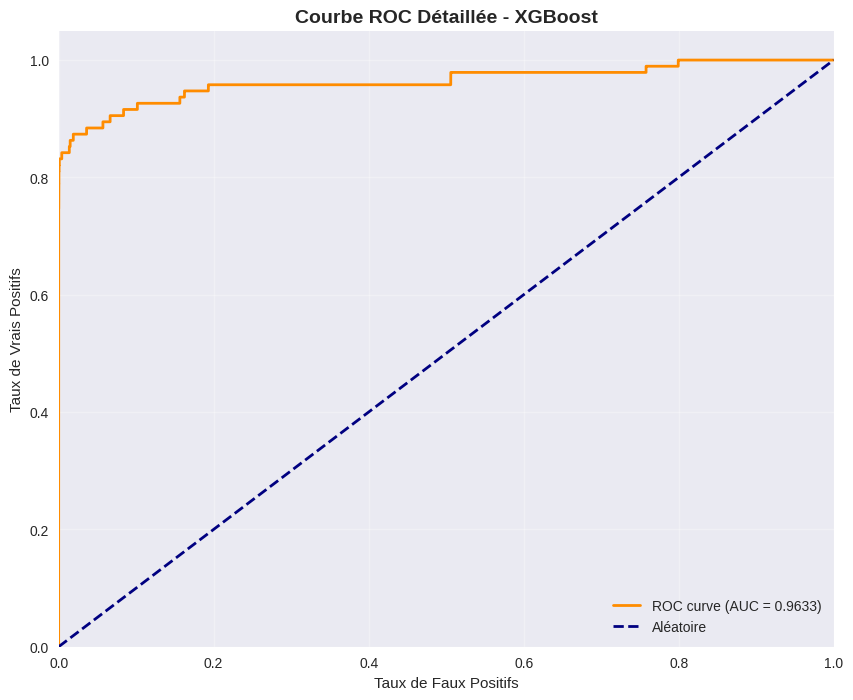

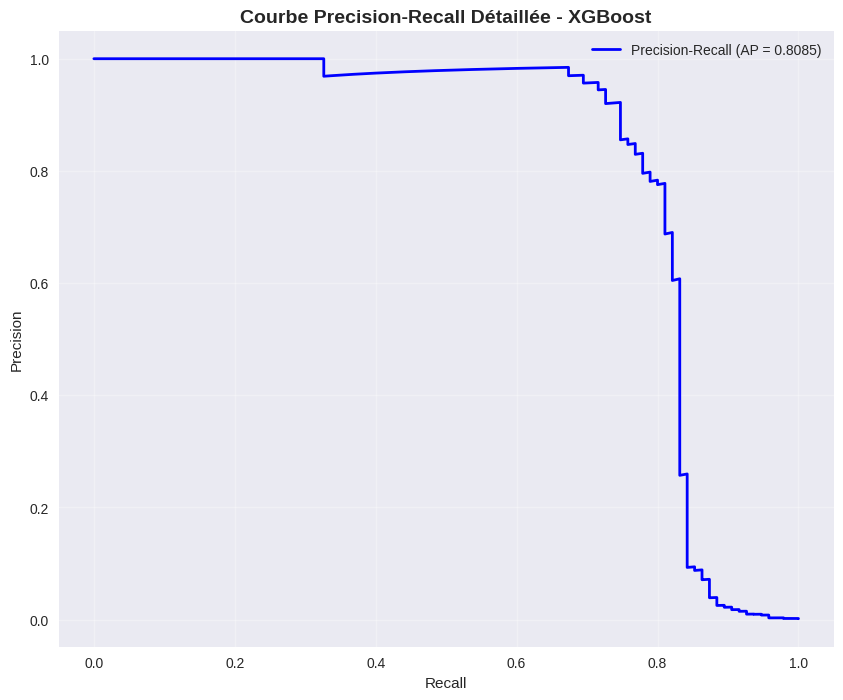

In [100]:

#  Courbes détaillées
print("\nCOURBES DE PERFORMANCE DÉTAILLÉES:")

# Courbe ROC détaillée
fpr, tpr, _ = roc_curve(y_test, best_model_results['y_pred_proba'])
roc_auc = best_model_results['roc_auc']

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title(f'Courbe ROC Détaillée - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Courbe Precision-Recall détaillée
precision, recall, _ = precision_recall_curve(y_test, best_model_results['y_pred_proba'])
avg_precision = best_model_results['avg_precision']

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Courbe Precision-Recall Détaillée - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()



ANALYSE DES PRÉDICTIONS:


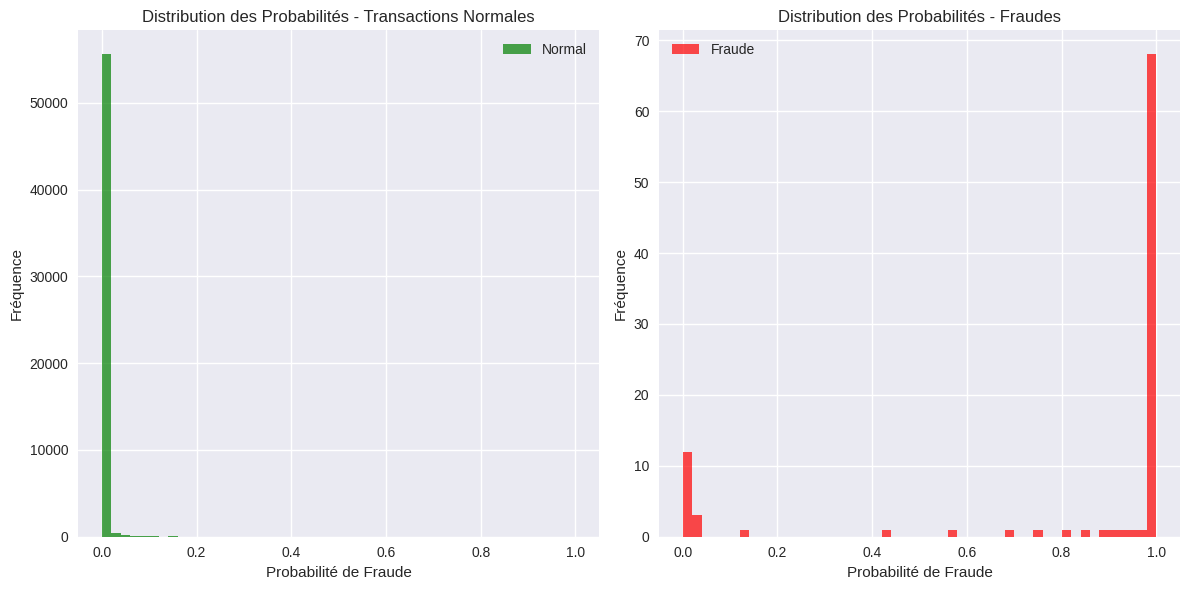

In [101]:

# Analyse des prédictions
print("\nANALYSE DES PRÉDICTIONS:")
y_pred = best_model_results['y_pred']
y_pred_proba = best_model_results['y_pred_proba']

# Distribution des probabilités de prédiction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, label='Normal', color='green')
plt.title('Distribution des Probabilités - Transactions Normales')
plt.xlabel('Probabilité de Fraude')
plt.ylabel('Fréquence')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, label='Fraude', color='red')
plt.title('Distribution des Probabilités - Fraudes')
plt.xlabel('Probabilité de Fraude')
plt.ylabel('Fréquence')
plt.legend()

plt.tight_layout()
plt.show()